#    Model For Predictive Potential Spammer

In [3]:
# Enable GPU in Colab
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3496969768930533623
 xla_global_id: -1]

In [1]:
from IPython.display import display, Image

# Specify the URL of your image
image_url = 'https://st3.depositphotos.com/7652440/14222/v/1600/depositphotos_142221644-stock-illustration-spammer-rubber-stamp.jpg'

# Display the image in the notebook
display(Image(url=image_url))

In [4]:
#Importing the Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [5]:
#Importing the data
PPS_df = pd.read_csv("/content/fiverr_data.csv")

# Data Exploration

In [16]:
#See the data using head function.
PPS_df.head(10).T

0        1        2        3        4       5        6  \
label        0.0      0.0      0.0      0.0      0.0     0.0      0.0   
user_id      1.0      2.0      3.0      4.0      5.0     6.0      7.0   
X1       20972.0   7362.0  21216.0   2261.0   4543.0  7353.0  13668.0   
X2          14.0    213.0    215.0    212.0    213.0   213.0    213.0   
X3          13.0     71.0     71.0     71.0     71.0    13.0     71.0   
X4           3.0      3.0      3.0      2.0      2.0     3.0      2.0   
X5          11.0     11.0     11.0      8.0      8.0    11.0      8.0   
X6           1.0      1.0      1.0      1.0      1.0     1.0      1.0   
X7           2.0      2.0      2.0      2.0      2.0     2.0      2.0   
X8          15.0     15.0     15.0     15.0     15.0    15.0     15.0   
X9          26.0     26.0     14.0     14.0     14.0    36.0     26.0   
X10      48955.0  48955.0  48955.0  48909.0  48955.0     1.0  48955.0   
X11          0.0      0.0      0.0      0.0      0.0     0.0      0.0   
X12          0.0      0.0      0.0      0.0      0.0     0.0      0.0   
X13          0.0      0.0      0.0      0.0      0.0     0.0      0.0   
X14          0.0      0.0      0.0      0.0      0.0     0.0      0.0   
X15          0.0      0.0      1.0      0.0      0.0     0.0      0.0   
X16         10.0     10.0     14.0     11.0     13.0    10.0     10.0   
X17          2.0      2.0      0.0      0.0      1.0     2.0      7.0   
X18          7.0      9.0     11.0      7.0     11.0     8.0      7.0   
X19          0.0      0.0      0.0      0.0      0.0     0.0      0.0   
X20          1.0      1.0      1.0      1.0      1.0     0.0      1.0   
X21         12.0     12.0     11.0     13.0     25.0    19.0     15.0   
X22         11.0     12.0     11.0     13.0     19.0    15.0     12.0   
X23          1.0      2.0      1.0      0.0      5.0     2.0      1.0   
X24          0.0      0.0      0.0      1.0      0.0     0.0      2.0   
X25          0.0      0.0      0.0      0.0      1.0     0.0      0.0   
X26          0.0      0.0      0.0      0.0      0.0     0.0      0.0   
X27          0.0      0.0      0.0      0.0      0.0     0.0      0.0   
X28          0.0      0.0      0.0      0.0      0.0     0.0      0.0   
X29          0.0      0.0      0.0      0.0      0.0     0.0      0.0   
X30          0.0      0.0      0.0      0.0      0.0     0.0      0.0   
X31          0.0      0.0      0.0      0.0      0.0     0.0      0.0   
X32          0.0      0.0      0.0      0.0      0.0     0.0      0.0   
X33          0.0      0.0      0.0      0.0      0.0     0.0      0.0   
X34          0.0      0.0      0.0      0.0      0.0     0.0      0.0   
X35          0.0      0.0      0.0      0.0      0.0     0.0      0.0   
X36          1.0      1.0      1.0      1.0      1.0     1.0      1.0   
X37          0.0      0.0      0.0      0.0      0.0     0.0      0.0   
X38          1.0      0.0      0.0      0.0      0.0     0.0      0.0   
X39          0.0      0.0      0.0      0.0      0.0     0.0      1.0   
X40          0.0      0.0      0.0      0.0      0.0     0.0      0.0   
X41          0.0      0.0      0.0      0.0      0.0     0.0      0.0   
X42          0.0      0.0      0.0      0.0      0.0     1.0      0.0   
X43          0.0      0.0      0.0      0.0      0.0     0.0      0.0   
X44          0.0      0.0      0.0      0.0      0.0     0.0      0.0   
X45          0.0      0.0      0.0      0.0      0.0     0.0      0.0   
X46          0.0      0.0      0.0      0.0      0.0     0.0      0.0   
X47          0.0      0.0      0.0      0.0      0.0     0.0      0.0   
X48          0.0      0.0      0.0      0.0      0.0     0.0      0.0   
X49          0.0      0.0      0.0      1.0      0.0     1.0      1.0   
X50          1.0      0.0      0.0      0.0      0.0     0.0      0.0   
X51          0.0      0.0      0.0      0.0      0.0     0.0      0.0   

               7        8        9  
label        0.0      0.0      0.0 

In [17]:
#See the data using tail function.
PPS_df.tail(5).T

458793    458794    458795    458796    458797
label         0.0       0.0       0.0       0.0       0.0
user_id  482931.0  482932.0  482933.0  482934.0  482935.0
X1            1.0    6139.0    1164.0     187.0   19901.0
X2          213.0     211.0     213.0     137.0     213.0
X3           13.0      13.0      13.0      14.0      13.0
X4            3.0       3.0       3.0       2.0       3.0
X5           16.0      11.0      11.0       2.0      11.0
X6            4.0       4.0       4.0       4.0       4.0
X7            4.0       4.0       4.0       4.0       4.0
X8           22.0      22.0      22.0      22.0      22.0
X9           27.0      28.0      26.0      14.0      14.0
X10       47159.0   43936.0       1.0    7193.0   49496.0
X11           0.0       0.0       0.0       0.0       0.0
X12           0.0       0.0       0.0       0.0       0.0
X13           0.0       0.0       0.0       0.0       0.0
X14           0.0       0.0       0.0       0.0       0.0
X15           0.0       0.0       1.0       0.0       0.0
X16          12.0       7.0      10.0      15.0       8.0
X17           3.0       0.0       0.0       0.0       0.0
X18          11.0       5.0      10.0      11.0       7.0
X19           4.0       1.0       0.0       0.0       0.0
X20           1.0       1.0       0.0       1.0       1.0
X21          16.0      16.0      39.0      17.0      12.0
X22          14.0      14.0      27.0      12.0      11.0
X23           5.0       9.0       3.0       1.0       0.0
X24           0.0       0.0       1.0       0.0       0.0
X25           0.0       0.0       1.0       0.0       1.0
X26           0.0       0.0       0.0       0.0       0.0
X27           0.0       0.0       0.0       0.0       0.0
X28           0.0       1.0       1.0       0.0       0.0
X29           0.0       0.0       0.0       0.0       0.0
X30           0.0       0.0       0.0       0.0       0.0
X31           1.0       2.0       1.0       1.0       2.0
X32           0.0       1.0       1.0       1.0       1.0
X33           0.0       0.0       0.0       0.0       0.0
X34           1.0       1.0       1.0       1.0       1.0
X35           1.0       1.0       1.0       1.0       1.0
X36           0.0       0.0       0.0       0.0       0.0
X37           0.0       0.0       0.0       0.0       0.0
X38           0.0       0.0       0.0       0.0       0.0
X39           0.0       0.0       0.0       1.0       0.0
X40           0.0       0.0       0.0       0.0       0.0
X41           0.0       0.0       0.0       0.0       0.0
X42           0.0       0.0       2.0       0.0       0.0
X43           0.0       0.0       0.0       0.0       0.0
X44           0.0       1.0       0.0       0.0       0.0
X45           0.0       0.0       0.0       0.0       0.0
X46           0.0       0.0       0.0       0.0       0.0
X47           0.0       0.0       0.0       0.0       0.0
X48           0.0       0.0       0.0       0.0       0.0
X49           0.0       0.0       1.0       0.0       0.0
X50           1.0       1.0       1.0       1.0       0.0
X51           0.0       0.0       0.0       0.0       0.0

In [18]:
#See the random Rows present in the data.
PPS_df.sample(5).T

284378    254449    204596    119390   37842 
label         0.0       0.0       0.0       0.0      0.0
user_id  299199.0  267630.0  215073.0  125546.0  39839.0
X1        17716.0       1.0   14435.0   12509.0   8835.0
X2          212.0     213.0      78.0     213.0    222.0
X3           13.0      51.0      33.0      13.0     14.0
X4            3.0       2.0       3.0       3.0      2.0
X5           11.0       8.0      16.0      17.0      2.0
X6            4.0       2.0       3.0       3.0      3.0
X7            2.0       9.0       3.0      11.0      2.0
X8           15.0      22.0      15.0      14.0     15.0
X9           14.0      14.0      14.0      14.0     14.0
X10       48955.0   48955.0   48955.0   47124.0      1.0
X11           0.0       0.0       0.0       0.0      0.0
X12           0.0       0.0       0.0       0.0      0.0
X13           0.0       0.0       0.0       0.0      0.0
X14           0.0       0.0       0.0       0.0      0.0
X15           0.0       1.0       0.0       0.0      0.0
X16          15.0       9.0      21.0       9.0     15.0
X17           2.0       2.0       0.0       6.0      0.0
X18          14.0       7.0      12.0       7.0     11.0
X19           0.0       0.0       0.0       1.0      0.0
X20           1.0       1.0       1.0       1.0      0.0
X21          75.0      29.0      14.0      16.0     13.0
X22          17.0      19.0      14.0      16.0     12.0
X23           1.0       2.0       0.0       4.0      0.0
X24           3.0       2.0       0.0       0.0      0.0
X25           1.0       0.0       0.0       0.0      1.0
X26           0.0       0.0       0.0       0.0      0.0
X27           0.0       0.0       0.0       0.0      0.0
X28           0.0       0.0       0.0       0.0      0.0
X29           0.0       0.0       0.0       0.0      0.0
X30           0.0       0.0       0.0       0.0      0.0
X31           1.0       0.0       0.0       0.0      0.0
X32           1.0       0.0       0.0       0.0      0.0
X33           0.0       0.0       0.0       0.0      0.0
X34           1.0       0.0       0.0       0.0      0.0
X35           1.0       0.0       0.0       0.0      0.0
X36           0.0       1.0       1.0       1.0      1.0
X37           0.0       0.0       0.0       0.0      0.0
X38           0.0       1.0       0.0       0.0      0.0
X39           0.0       0.0       1.0       1.0      1.0
X40           0.0       0.0       0.0       0.0      0.0
X41           0.0       0.0       0.0       0.0      0.0
X42           0.0       0.0       0.0       0.0      0.0
X43           0.0       0.0       0.0       0.0      0.0
X44           0.0       0.0       0.0       0.0      0.0
X45           0.0       0.0       0.0       0.0      0.0
X46           0.0       0.0       0.0       0.0      0.0
X47           0.0       0.0       0.0       0.0      0.0
X48           0.0       0.0       0.0       0.0      0.0
X49           1.0       1.0       0.0       0.0      0.0
X50           0.0       0.0       1.0       1.0      0.0
X51           0.0       0.0       0.0       0.0      0.0

In [6]:
#using shape funnction to get data size(Rows,columns) of the data.
PPS_df.shape

(458798, 53)

In [20]:
#getting the all names of the columns.
PPS_df.columns

Index(['label', 'user_id', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8',
       'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18',
       'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28',
       'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38',
       'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48',
       'X49', 'X50', 'X51'],
      dtype='object')

In [21]:
#using info method to see how my model looks like.
PPS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458798 entries, 0 to 458797
Data columns (total 53 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   label    458798 non-null  int64  
 1   user_id  458798 non-null  int64  
 2   X1       458798 non-null  int64  
 3   X2       458798 non-null  int64  
 4   X3       458798 non-null  int64  
 5   X4       458798 non-null  int64  
 6   X5       458798 non-null  int64  
 7   X6       458798 non-null  int64  
 8   X7       458798 non-null  int64  
 9   X8       458798 non-null  int64  
 10  X9       458798 non-null  int64  
 11  X10      458798 non-null  int64  
 12  X11      458798 non-null  int64  
 13  X12      458798 non-null  int64  
 14  X13      458792 non-null  float64
 15  X14      458798 non-null  int64  
 16  X15      458798 non-null  int64  
 17  X16      458798 non-null  int64  
 18  X17      458798 non-null  int64  
 19  X18      458798 non-null  int64  
 20  X19      458798 non-null  

In [22]:
#lets check the null values present in the data.
PPS_df.isnull().sum()

label      0
user_id    0
X1         0
X2         0
X3         0
X4         0
X5         0
X6         0
X7         0
X8         0
X9         0
X10        0
X11        0
X12        0
X13        6
X14        0
X15        0
X16        0
X17        0
X18        0
X19        0
X20        0
X21        0
X22        0
X23        0
X24        0
X25        0
X26        0
X27        0
X28        0
X29        0
X30        0
X31        0
X32        0
X33        0
X34        0
X35        0
X36        0
X37        0
X38        0
X39        0
X40        0
X41        0
X42        0
X43        0
X44        0
X45        0
X46        0
X47        0
X48        0
X49        0
X50        0
X51        0
dtype: int64

In [2]:
#by using isnull ---> we clearly see that, there are null values present in the data.
#columns which contains null values{X13}.

In [24]:
#lets check the data type of the column variables wheather it contain integer, float, or objects type of data.
PPS_df.dtypes

label        int64
user_id      int64
X1           int64
X2           int64
X3           int64
X4           int64
X5           int64
X6           int64
X7           int64
X8           int64
X9           int64
X10          int64
X11          int64
X12          int64
X13        float64
X14          int64
X15          int64
X16          int64
X17          int64
X18          int64
X19          int64
X20          int64
X21          int64
X22          int64
X23          int64
X24          int64
X25          int64
X26          int64
X27          int64
X28          int64
X29          int64
X30          int64
X31          int64
X32          int64
X33          int64
X34          int64
X35          int64
X36          int64
X37          int64
X38          int64
X39          int64
X40          int64
X41          int64
X42          int64
X43          int64
X44          int64
X45          int64
X46          int64
X47          int64
X48          int64
X49          int64
X50          int64
X51         

In [3]:
#Data is containing integer and float type of data.

In [26]:
#checking the statistical measures of the data.  eg: mean , median , 50th percentile, 75% or max etc.
PPS_df.describe().T

count           mean            std  min        25%       50%  \
label    458798.0       0.026855       0.161660  0.0       0.00       0.0   
user_id  458798.0  241363.771411  139440.017203  1.0  120595.25  241234.5   
X1       458798.0   10850.591243    7078.656632  1.0    4692.00   11574.0   
X2       458798.0     154.947696      67.952267  1.0      95.00     189.0   
X3       458798.0      28.107965      19.227303  1.0      13.00      14.0   
X4       458798.0       2.407831       0.800163  1.0       2.00       3.0   
X5       458798.0      10.985176       5.527487  1.0       8.00      11.0   
X6       458798.0       3.215446       0.811902  1.0       3.00       3.0   
X7       458798.0       5.082675       3.302548  1.0       2.00       5.0   
X8       458798.0      15.654039       4.993260  1.0      14.00      15.0   
X9       458798.0      17.663438       6.338223  1.0      14.00      14.0   
X10      458798.0   20368.205770   22837.166285  1.0       1.00    4378.5   
X11      458798.0       0.001796       0.042341  0.0       0.00       0.0   
X12      458798.0       0.007971       0.088923  0.0       0.00       0.0   
X13      458792.0       0.087454       0.310598  0.0       0.00       0.0   
X14      458798.0       0.019340       0.149538  0.0       0.00       0.0   
X15      458798.0       0.179563       0.479321  0.0       0.00       0.0   
X16      458798.0      11.909082       3.889814  1.0       9.00      12.0   
X17      458798.0       1.510190       1.867473  0.0       0.00       1.0   
X18      458798.0       9.116648       2.541091  1.0       7.00       9.0   
X19      458798.0       0.304940       3.552758  0.0       0.00       0.0   
X20      458798.0       0.512358       0.499848  0.0       0.00       1.0   
X21      458798.0      29.257200      32.999054  1.0      13.00      18.0   
X22      458798.0      16.166404       6.705688  1.0      12.00      14.0   
X23      458798.0       3.186806       4.143823  0.0       0.00       1.0   
X24      458798.0       0.203510       0.846675  0.0       0.00       0.0   
X25      458798.0       0.783177       2.852496  0.0       0.00       0.0   
X26      458798.0       0.022993       0.491043  0.0       0.00       0.0   
X27      458798.0       0.000000       0.000000  0.0       0.00       0.0   
X28      458798.0       0.444897       0.782575  0.0       0.00       0.0   
X29      458798.0       0.000000       0.000000  0.0       0.00       0.0   
X30      458798.0       0.000000       0.000000  0.0       0.00       0.0   
X31      458798.0       0.464124       0.900999  0.0       0.00       0.0   
X32      458798.0       0.536768       1.486929  0.0       0.00       0.0   
X33      458798.0       0.000000       0.000000  0.0       0.00       0.0   
X34      458798.0       0.398201       0.635505  0.0       0.00       0.0   
X35      458798.0       0.381710       0.626832  0.0       0.00       0.0   
X36      458798.0       0.483285       0.551332  0.0       0.00       0.0   
X37      458798.0       0.000532       0.031383  0.0       0.00       0.0   
X38      458798.0       0.086814       0.355296  0.0       0.00       0.0   
X39      458798.0       0.469900       0.721578  0.0       0.00       0.0   
X40      458798.0       0.019344       0.152753  0.0       0.00       0.0   
X41      458798.0       0.065436       0.392297  0.0       0.00       0.0   
X42      458798.0       0.519900       1.557607  0.0       0.00       0.0   
X43      458798.0       0.041033       0.253398  0.0       0.00       0.0   
X44      458798.0       0.074793       0.432161  0.0       0.00       0.0   
X45      458798.0       0.008123       0.089763  0.0       0.00       0.0   
X46      458798.0       0.000000       0.000000  0.0       0.00       0.0   
X47      458798.0       0.000000       0.000000  0.0       0.00       0.0   
X48      458798.0       0.000000       0.000000  0.0       0.00       0.0   
X49      458798.0       0.299703       0.458128  0.0       0.00       0.0   
X50     

1. Label (Target Variable):

The mean of the label is 0.026855, indicating that it is a highly imbalanced binary classification problem, as the mean is close to zero.

The maximum value is 1.0, suggesting that this is a binary classification task.

2. User ID:

The mean user ID is approximately 	241363.771, indicating a potential large user base.

3. Features X1 to X51:

The features X1 to X51 have varying ranges and scales.

Some features, like X11, X12, X27, X29, X30, and X33, have a mean and standard deviation close to zero, suggesting that they might be mostly zeros.

Features like X10, X21, and X22 have a wide range, with a large standard deviation.

4. Highly Imbalanced Features:

Some features, like X27, X29, X30, X33, X46, X47, and X48, seem to be highly imbalanced with mean and standard deviation close to zero.

5. Outliers:

Features like X21, X22, X23, and X28 have higher maximum values compared to their 75th percentiles, suggesting potential outliers.

6. Missing Values:
If X13 has a count of 42083 while other features have a count of 458792.0, it suggests that there might be one missing value in X13.

In [27]:
#null values can also is different form eg.@,#,$,%,^,&,*,@,! etc. if there is any null values present in this form we will use replace function with NaN so that my function easily read the null values.
# Specify the characters to check
specified_chars = ['@', '#', '$', '%', '^', '&', '*', '@', '!']

# Create a boolean DataFrame indicating whether any of the specified characters are present
contains_special_chars = PPS_df.isin(specified_chars)

# Check if any cell in the DataFrame contains the specified characters
contains_special_chars_anywhere = contains_special_chars.any().any()

# Display the result
if contains_special_chars_anywhere:
    print("The specified characters are present in your data.")
else:
    print("The specified characters are not present in your data.")

The specified characters are not present in your data.


In [28]:
#checking the correlation of the data with each other.
PPS_df.corr()

label   user_id        X1        X2        X3        X4        X5  \
label    1.000000  0.061876 -0.032693  0.013588  0.029224 -0.160983 -0.120901   
user_id  0.061876  1.000000  0.013957  0.014969 -0.138243  0.295803  0.222938   
X1      -0.032693  0.013957  1.000000 -0.007159 -0.005513  0.074084  0.074294   
X2       0.013588  0.014969 -0.007159  1.000000  0.047257  0.011539  0.040342   
X3       0.029224 -0.138243 -0.005513  0.047257  1.000000 -0.334795 -0.318808   
X4      -0.160983  0.295803  0.074084  0.011539 -0.334795  1.000000  0.777915   
X5      -0.120901  0.222938  0.074294  0.040342 -0.318808  0.777915  1.000000   
X6       0.118793  0.723465  0.001220  0.018339 -0.157905  0.219334  0.147991   
X7      -0.119792  0.221098  0.016307  0.042581 -0.188255  0.490346  0.306014   
X8       0.048605 -0.114807 -0.011004 -0.042068  0.080587 -0.339239 -0.251238   
X9      -0.022055  0.190853  0.027944  0.059326  0.045473  0.075179  0.102487   
X10     -0.100047  0.069658  0.035474 -0.022699 -0.149559  0.322633  0.164281   
X11      0.120644  0.036195 -0.009772  0.006603 -0.005574  0.004757  0.008942   
X12      0.019983  0.031783 -0.078111  0.076462 -0.031508  0.029884  0.041073   
X13     -0.010180  0.105058 -0.009566 -0.034400 -0.024930  0.035121  0.044008   
X14     -0.017878  0.069924  0.003011 -0.011188  0.027997 -0.002490  0.003569   
X15      0.062969  0.032686  0.017542 -0.047919 -0.005814  0.037062  0.028913   
X16      0.057109 -0.040611 -0.029454 -0.045124  0.004233 -0.089475 -0.082818   
X17      0.059880 -0.063109 -0.041145 -0.018894 -0.005007 -0.129450 -0.098735   
X18      0.068317 -0.034246 -0.028100 -0.036959  0.012730 -0.081208 -0.063470   
X19      0.255836  0.037780 -0.007009  0.019319  0.006929 -0.066074 -0.045547   
X20     -0.108509  0.131372  0.043343 -0.029288 -0.160554  0.386188  0.216258   
X21     -0.060306  0.038227  0.030616 -0.026332 -0.002741  0.119419  0.074735   
X22     -0.137752 -0.026355  0.038910 -0.027644 -0.001407  0.171565  0.073889   
X23     -0.012464  0.145683  0.003540 -0.024808 -0.013997  0.075210  0.047369   
X24     -0.034945  0.004683  0.015655 -0.004497  0.012065  0.098003  0.043827   
X25     -0.041365  0.010408  0.018310 -0.002501  0.019129  0.053826  0.025115   
X26     -0.006049 -0.025403  0.000837  0.004643  0.019882 -0.082384 -0.037007   
X27           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
X28     -0.052109  0.177716  0.026855 -0.042228 -0.091970  0.284021  0.182814   
X29           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
X30           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
X31     -0.015480  0.516205  0.008644  0.009816 -0.084937  0.248845  0.170889   
X32     -0.015020  0.394026 -0.001395 -0.018198 -0.053815  0.159760  0.094940   
X33           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
X34     -0.028180  0.675787  0.018706  0.024032 -0.110252  0.317630  0.235063   
X35     -0.024651  0.664375  0.016886  0.020590 -0.102802  0.306514  0.225344   
X36     -0.125662 -0.495886  0.032489 -0.017314 -0.078314  0.347744  0.161736   
X37     -0.002815  0.010361  0.000421 -0.003702 -0.006640  0.003254 -0.005759   
X38     -0.036264  0.043413  0.009324 -0.029243  0.013163  0.059893 -0.006792   
X39     -0.088430 -0.315717  0.019376 -0.018848 -0.136520  0.290729  0.163475   
X40     -0.011593  0.000083  0.005827 -0.004527 -0.015763  0.059373  0.031833   
X41     -0.022142  0.016208  0.012042 -0.009253 -0.006906  0.072874  0.041236   
X42     -0.046576 -0.001015  0.021797 -0.001674  0.016148  0.049450  0.038266   
X43     -0.023761  0.007723  0.001440 -0.013477 -0.001081  0.040131 -0.010210   
X44     -0.022635  0.021242  0.012040 -0.011569 -0.010851  0.077870  0.046910   
X45     -0.010978  0.039277 -0.007417 -0.032602 -0.038949  0.056899  0.049953   
X46           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
X47           NaN       NaN       NaN      

A correlation coefficient close to 1 indicates a strong positive correlation, while a value close to -1 indicates a strong negative correlation.

1. Correlation Direction:

Positive correlation means that as one variable increases, the other tends to increase.

Negative correlation means that as one variable increases, the other tends to decrease.

For instance, in the label row, the correlation with X1 is -0.032693, indicating a slight negative correlation.

2. Missing Values:

The presence of NaN (Not a Number) values in the correlation matrix indicates missing or undefined values for some pairs of variables.

3. Highly Correlated Variables:

Identifying pairs of variables with high correlation (close to 1 or -1) may indicate redundancy.

For example, X6 and user_id have a correlation coefficient of 0.723465, suggesting a strong positive correlation.

4. Correlation Magnitude:

The magnitude of the correlation coefficient indicates the strength of the relationship.

A correlation coefficient close to 0 suggests a weak or no linear relationship.

In the X42 row, the correlation between X3 and X9 is 0.045473	, suggesting a relatively weak positive correlation.

In [7]:
PPS_df['X13']=PPS_df['X13'].fillna(PPS_df['X13'].mode())

Text(0.5, 1.0, 'Correlation Heatmap')

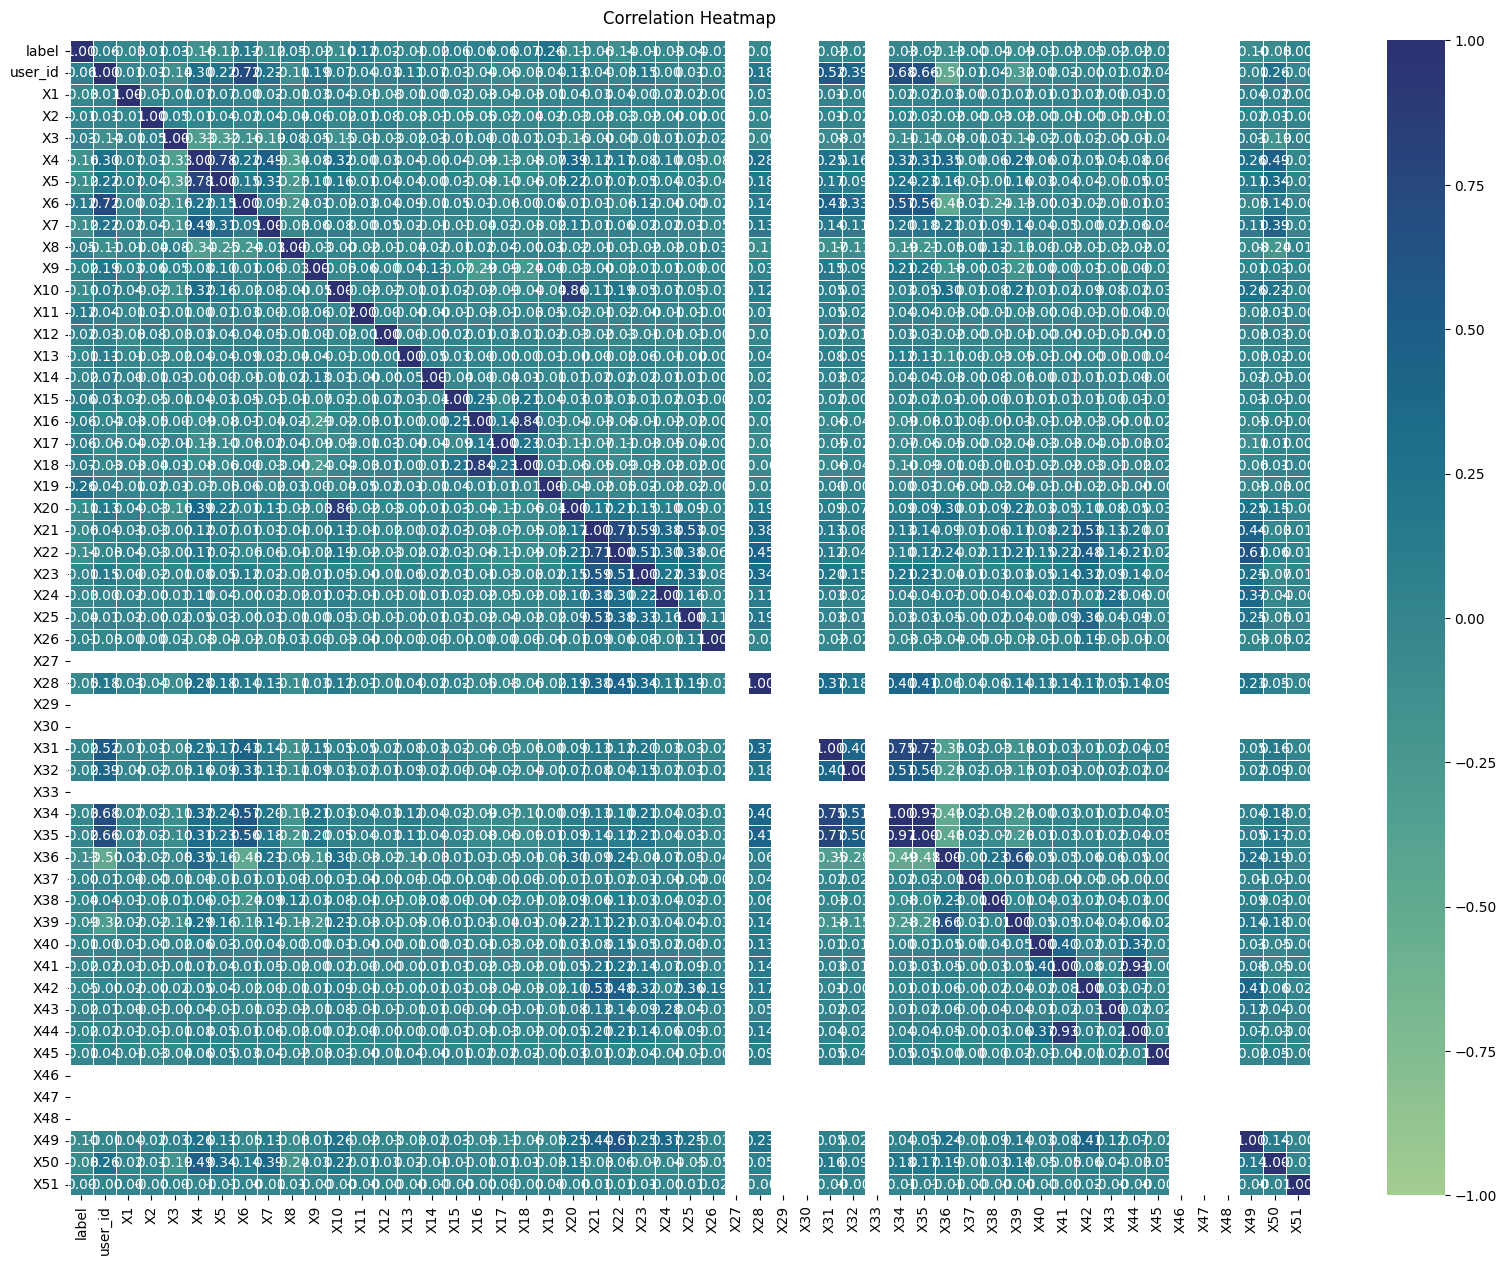

In [30]:
#visualizing the data using Heatmap.
plt.figure(figsize=(20,15))
heatmap = sns.heatmap(PPS_df.corr(), vmin=-1, vmax=1, annot=True, fmt=".2f", linewidth=.5, cmap="crest")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [8]:
#Dropping the unwanted columns having NAN values.
PPS_df.drop(columns=['X27','X29', 'X30', 'X33', 'X46', 'X47', 'X48'], inplace=True)

Text(0.5, 1.0, 'Correlation Heatmap')

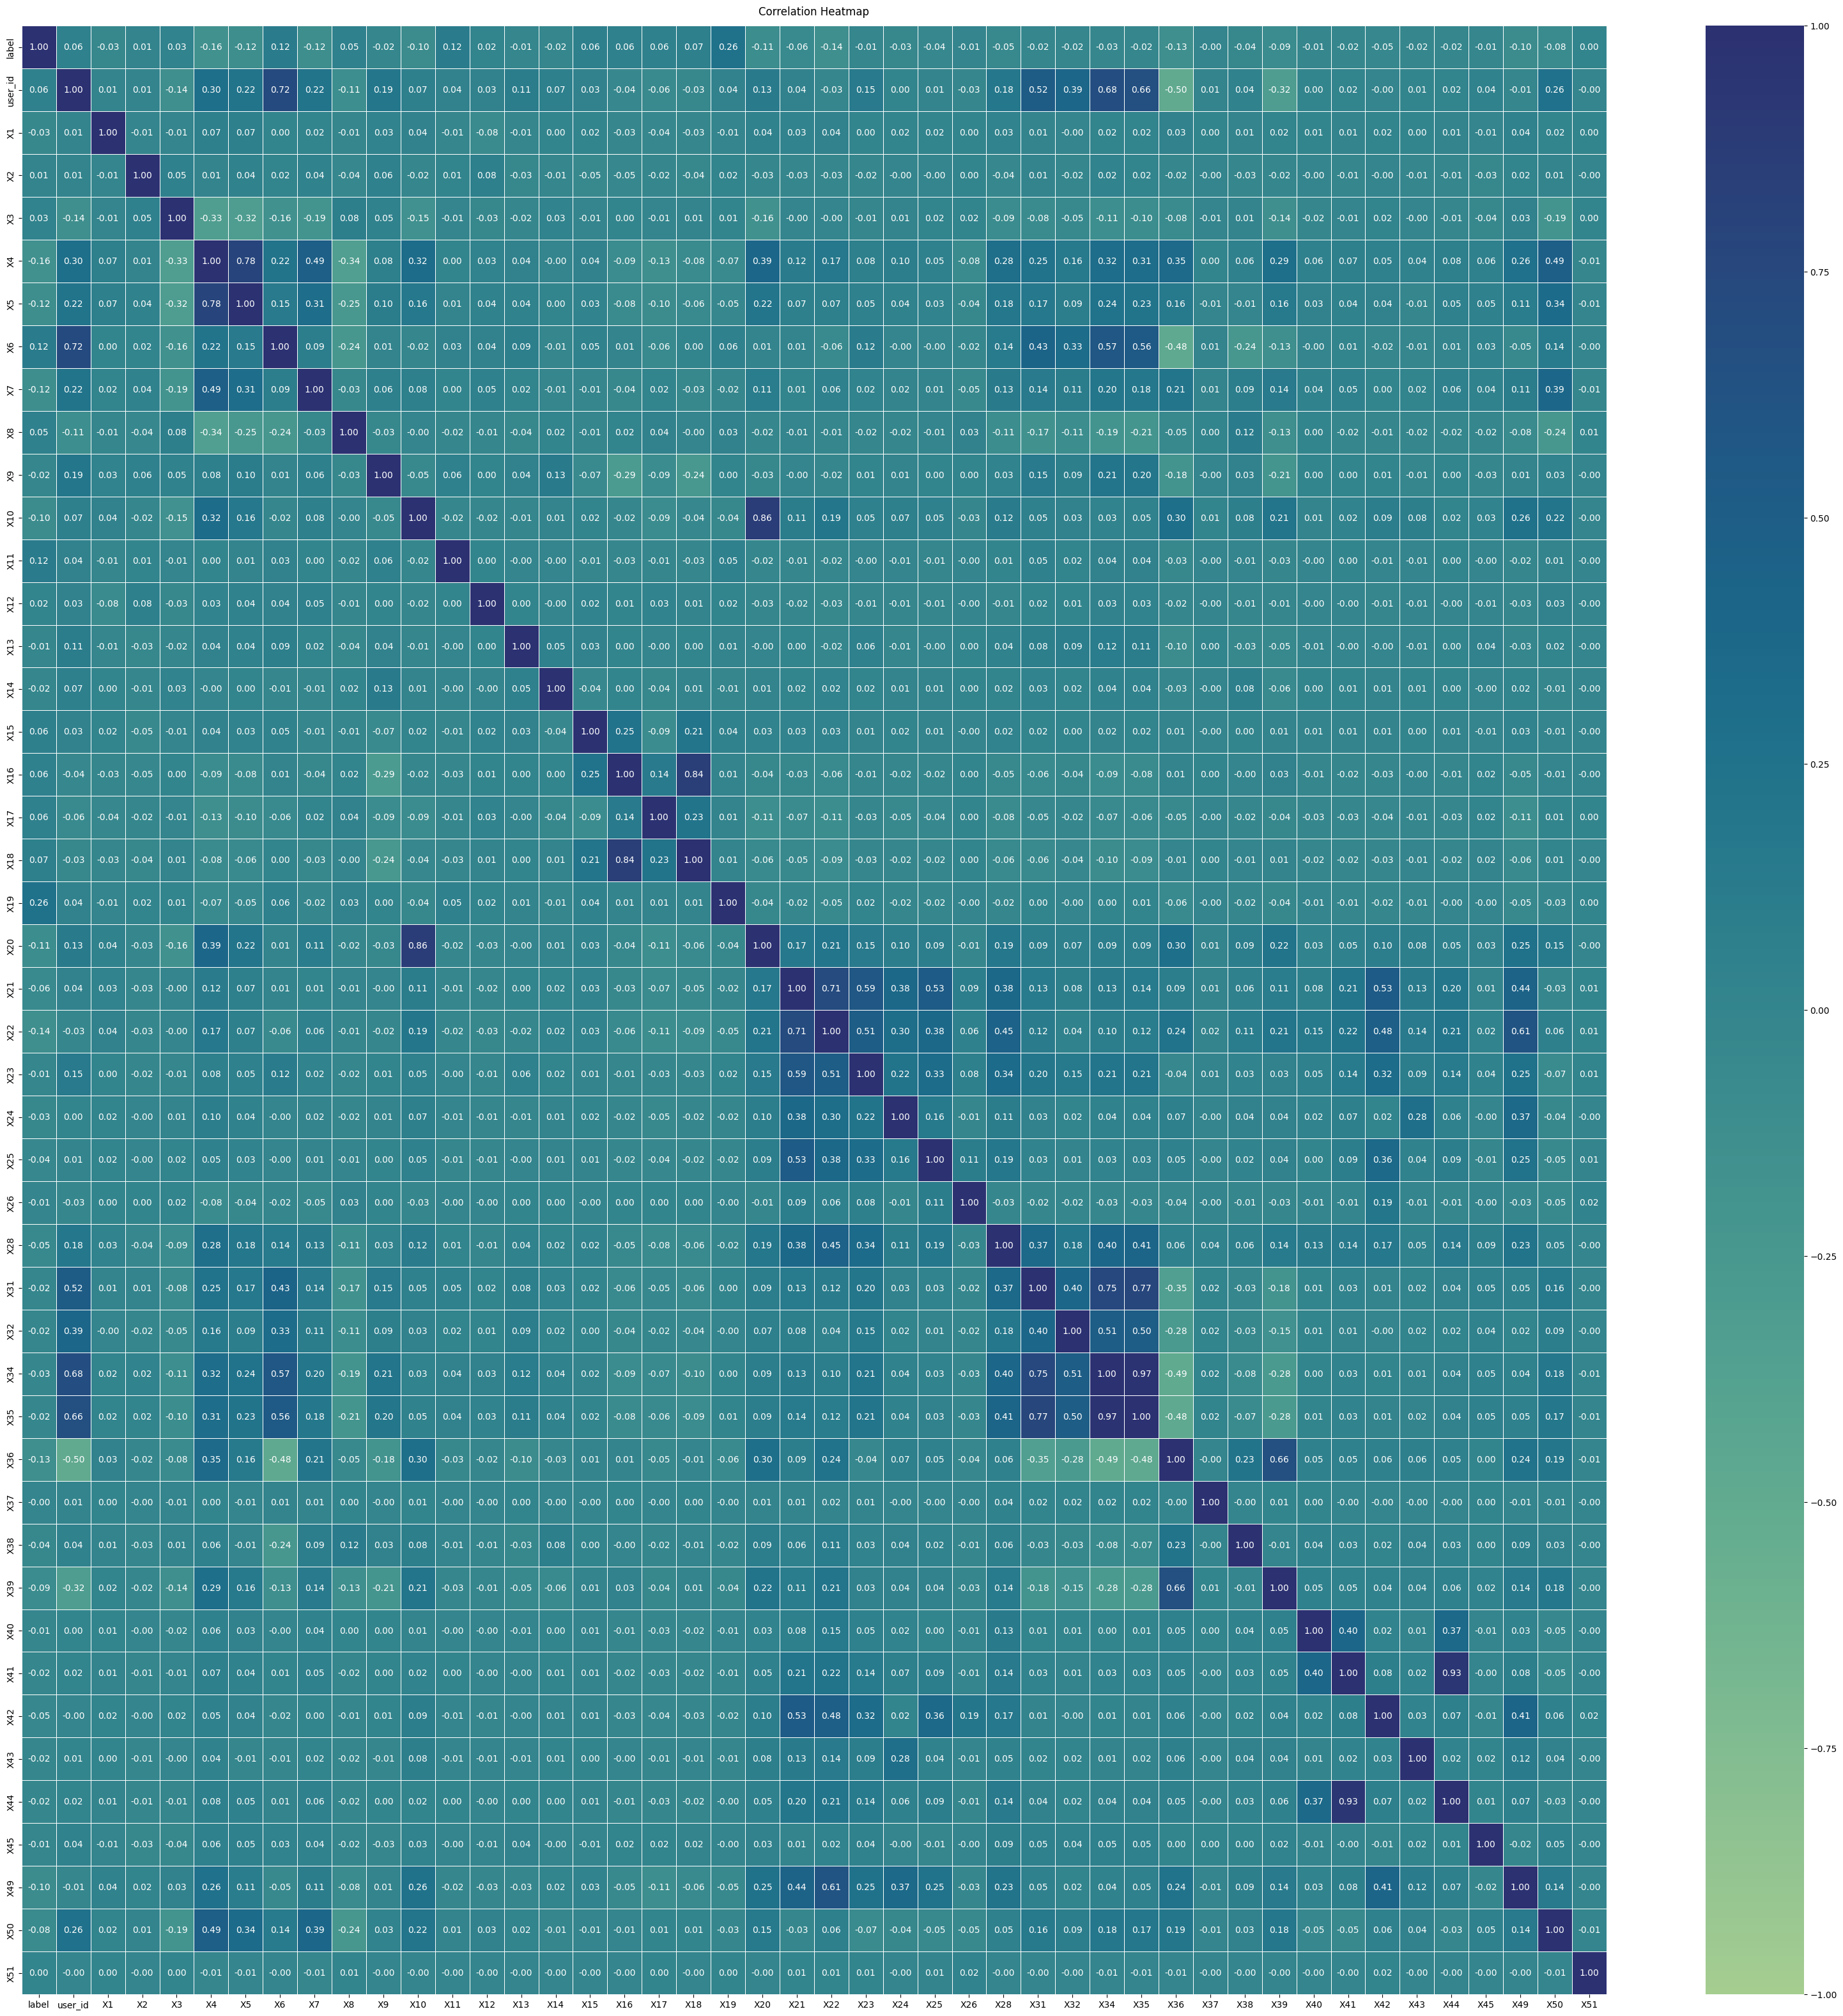

In [11]:
#Again visualizing the data to check wheather the NAN values is removed or not.
plt.figure(figsize=(40,40))
heatmap = sns.heatmap(PPS_df.corr(), vmin=-1, vmax=1, annot=True, fmt=".2f", linewidth=.5, cmap="crest")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

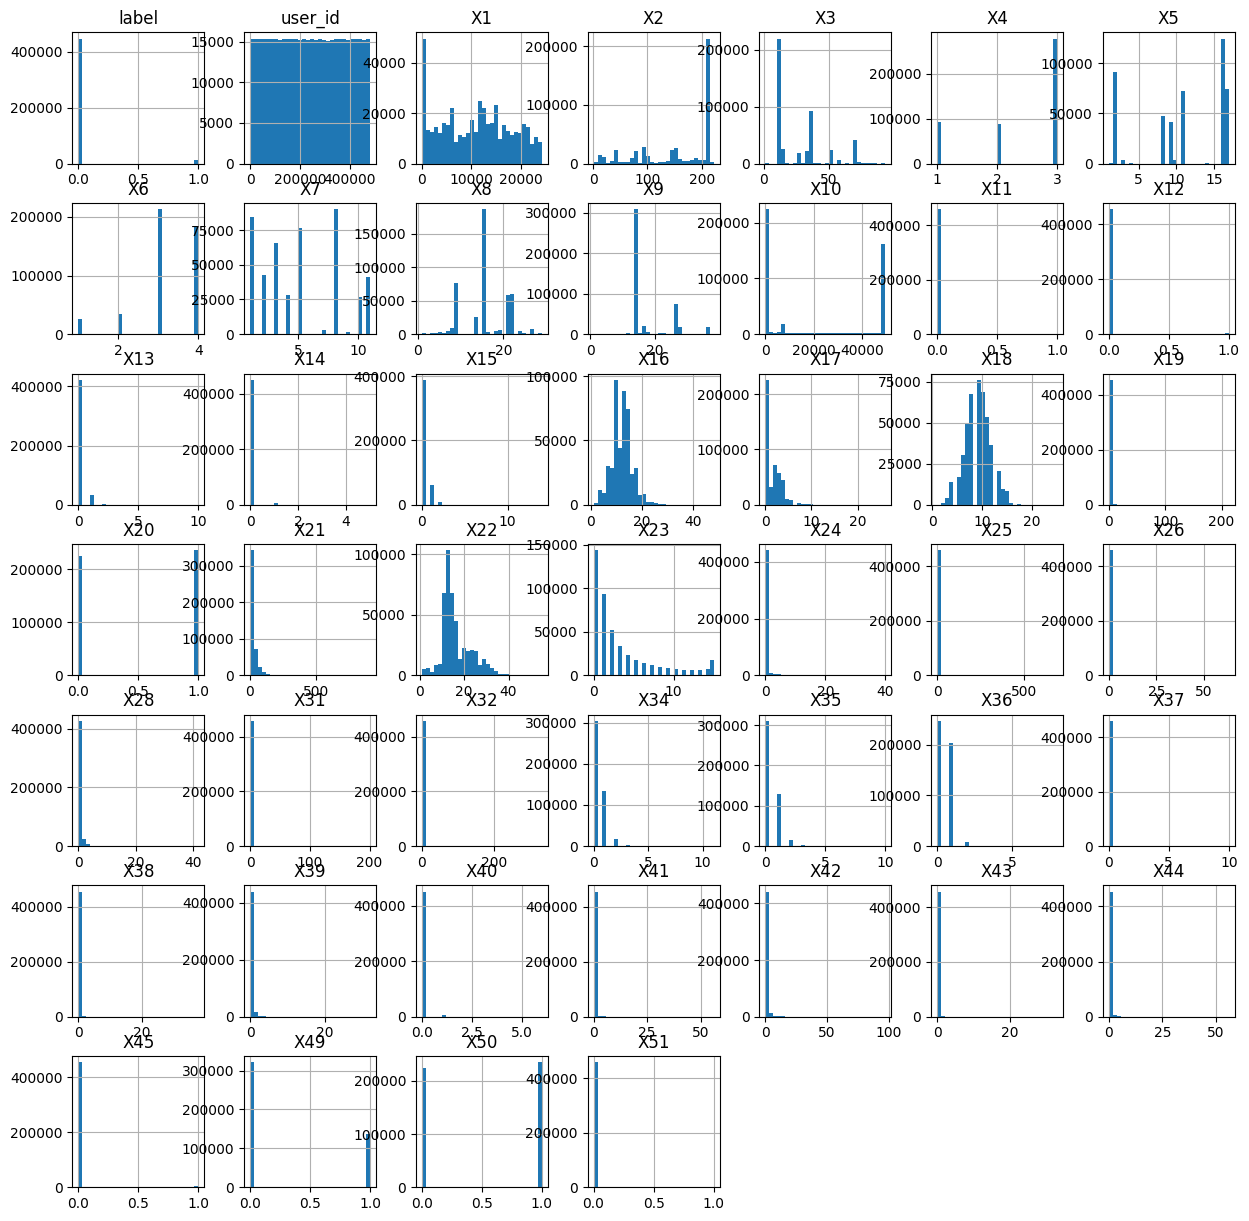

In [33]:
#Multivariate Analysis
#visualizing the data using histogram chart.
PPS_df.hist(bins=30, figsize=(15,15))
plt.show()

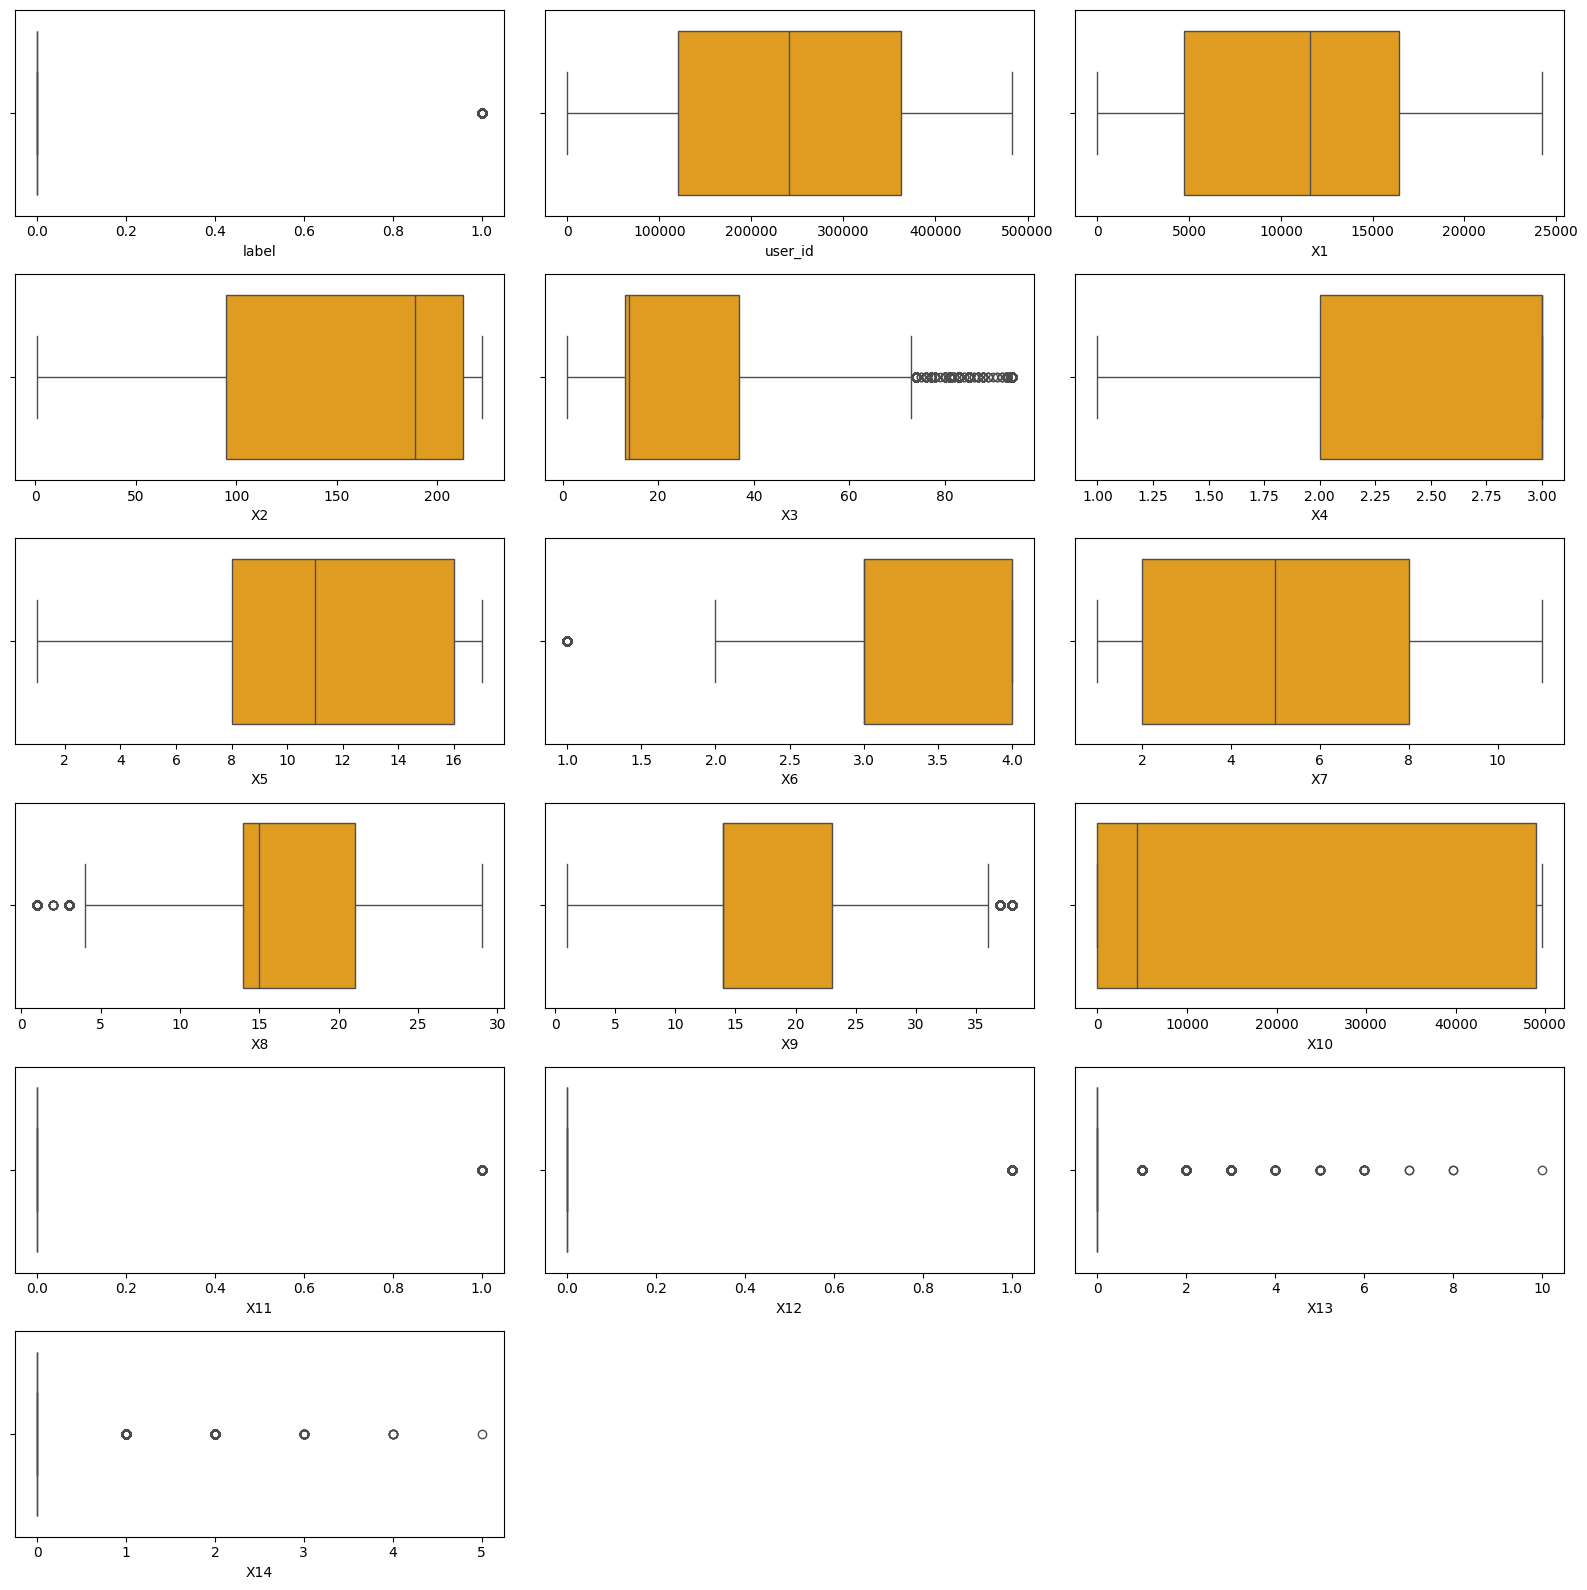

In [34]:
#lets check the outliers by using box plot.
plt.figure(figsize=(16,16),facecolor='white')
pltnum =1
for column in PPS_df:
    if pltnum <= 16:
        ax = plt.subplot(6,3,pltnum)
        sns.boxplot(x=column,data=PPS_df,color='orange')
    pltnum +=1
plt.tight_layout()
plt.show()

In [9]:
# Function to treat outliers using the IQR method
def treat_outliers_iqr(PPS_df, factor = 1.5):
    Q1 = PPS_df.quantile(0.25)
    Q3 = PPS_df.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR

    # Cap outliers beyond the threshold
    PPS = PPS_df.apply(lambda x: min(max(x, lower_bound), upper_bound))

    return PPS_df

# Apply the IQR method to treat outliers for each numerical column
for column in PPS_df.select_dtypes(include=['number']).columns:
    PPS_df[column] = treat_outliers_iqr(PPS_df[column])

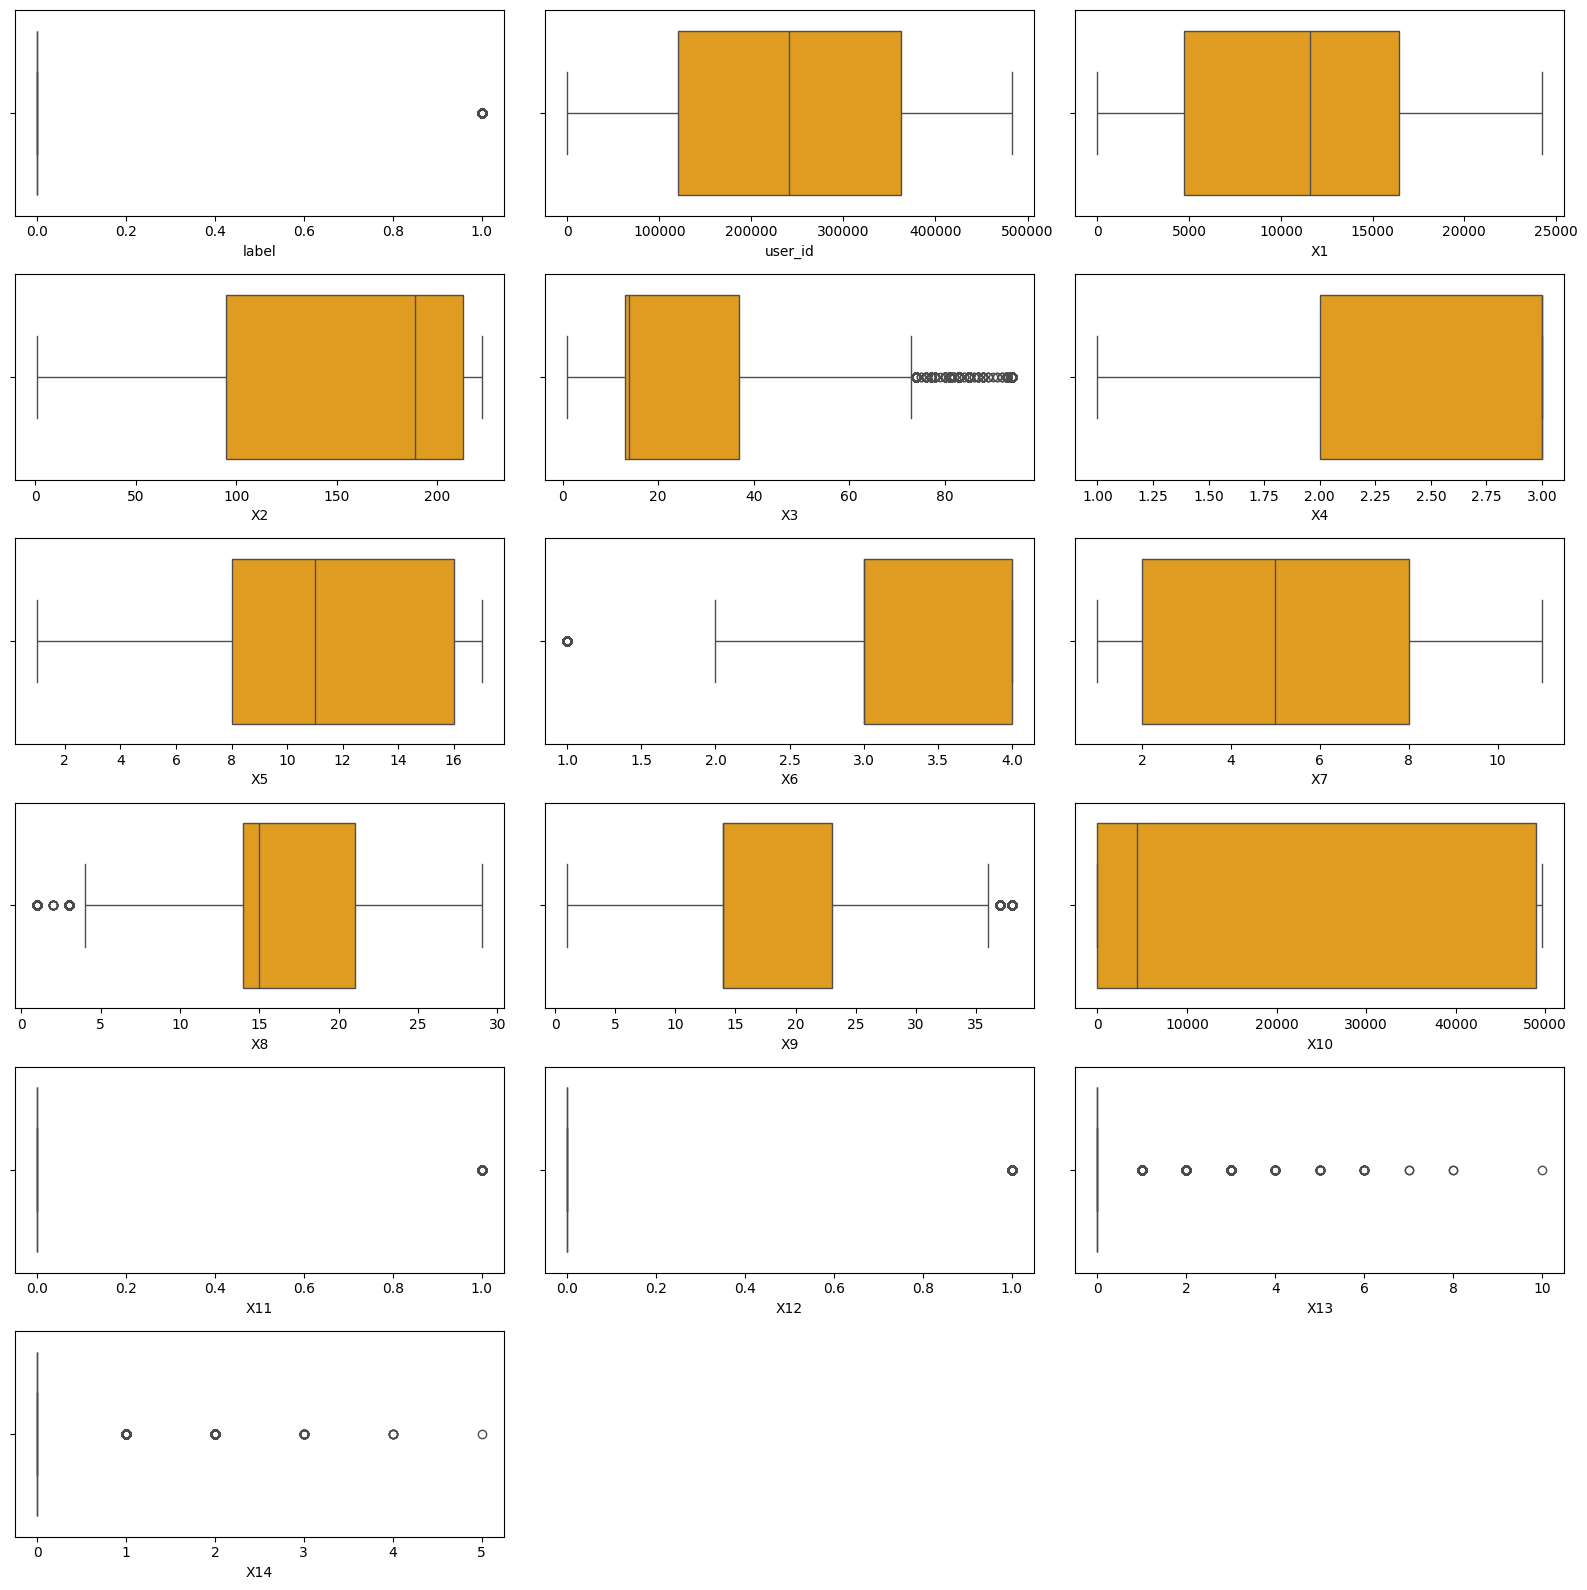

In [10]:
#lets check the outliers by using box plot.
plt.figure(figsize=(16,16),facecolor='white')
pltnum =1
for column in PPS_df:
    if pltnum <= 16:
        ax = plt.subplot(6,3,pltnum)
        sns.boxplot(x=column,data=PPS_df,color='orange')
    pltnum +=1
plt.tight_layout()
plt.show()

In [37]:
#Scaling the data.

In [11]:
x_scale = PPS_df.iloc[:,1:]   #scaling independent variables of the data.

In [12]:
#scaling data using Min Max scalar.
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [13]:
PPS_scaled = scale.fit_transform(x_scale)

In [14]:
PPS_scaled

array([[0.00000000e+00, 8.65390170e-01, 5.88235294e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.07067632e-06, 3.03759336e-01, 9.59276018e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.14135265e-06, 8.75459085e-01, 9.68325792e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.99995859e-01, 4.79924070e-02, 9.59276018e-01, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [9.99997929e-01, 7.67548384e-03, 6.15384615e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 8.21194239e-01, 9.59276018e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [15]:
PPS_sc = pd.DataFrame(PPS_scaled,columns=[ 'user_id', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8',
       'X9', 'X10', 'X11', 'X12','X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X28', 'X31', 'X32',
       'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43',
       'X44', 'X45', 'X49', 'X50','X51'])
PPS_sc.head(5).T

0         1         2         3         4
user_id  0.000000  0.000002  0.000004  0.000006  0.000008
X1       0.865390  0.303759  0.875459  0.093261  0.187430
X2       0.058824  0.959276  0.968326  0.954751  0.959276
X3       0.129032  0.752688  0.752688  0.752688  0.752688
X4       1.000000  1.000000  1.000000  0.500000  0.500000
X5       0.625000  0.625000  0.625000  0.437500  0.437500
X6       0.000000  0.000000  0.000000  0.000000  0.000000
X7       0.100000  0.100000  0.100000  0.100000  0.100000
X8       0.500000  0.500000  0.500000  0.500000  0.500000
X9       0.675676  0.675676  0.351351  0.351351  0.351351
X10      0.986260  0.986260  0.986260  0.985333  0.986260
X11      0.000000  0.000000  0.000000  0.000000  0.000000
X12      0.000000  0.000000  0.000000  0.000000  0.000000
X13      0.000000  0.000000  0.000000  0.000000  0.000000
X14      0.000000  0.000000  0.000000  0.000000  0.000000
X15      0.000000  0.000000  0.071429  0.000000  0.000000
X16      0.191489  0.191489  0.276596  0.212766  0.255319
X17      0.076923  0.076923  0.000000  0.000000  0.038462
X18      0.250000  0.333333  0.416667  0.250000  0.416667
X19      0.000000  0.000000  0.000000  0.000000  0.000000
X20      1.000000  1.000000  1.000000  1.000000  1.000000
X21      0.012061  0.012061  0.010965  0.013158  0.026316
X22      0.185185  0.203704  0.185185  0.222222  0.333333
X23      0.066667  0.133333  0.066667  0.000000  0.333333
X24      0.000000  0.000000  0.000000  0.025000  0.000000
X25      0.000000  0.000000  0.000000  0.000000  0.001453
X26      0.000000  0.000000  0.000000  0.000000  0.000000
X28      0.000000  0.000000  0.000000  0.000000  0.000000
X31      0.000000  0.000000  0.000000  0.000000  0.000000
X32      0.000000  0.000000  0.000000  0.000000  0.000000
X34      0.000000  0.000000  0.000000  0.000000  0.000000
X35      0.000000  0.000000  0.000000  0.000000  0.000000
X36      0.125000  0.125000  0.125000  0.125000  0.125000
X37      0.000000  0.000000  0.000000  0.000000  0.000000
X38      0.026316  0.000000  0.000000  0.000000  0.000000
X39      0.000000  0.000000  0.000000  0.000000  0.000000
X40      0.000000  0.000000  0.000000  0.000000  0.000000
X41      0.000000  0.000000  0.000000  0.000000  0.000000
X42      0.000000  0.000000  0.000000  0.000000  0.000000
X43      0.000000  0.000000  0.000000  0.000000  0.000000
X44      0.000000  0.000000  0.000000  0.000000  0.000000
X45      0.000000  0.000000  0.000000  0.000000  0.000000
X49      0.000000  0.000000  0.000000  1.000000  0.000000
X50      1.000000  0.000000  0.000000  0.000000  0.000000
X51      0.000000  0.000000  0.000000  0.000000  0.000000

<Axes: >

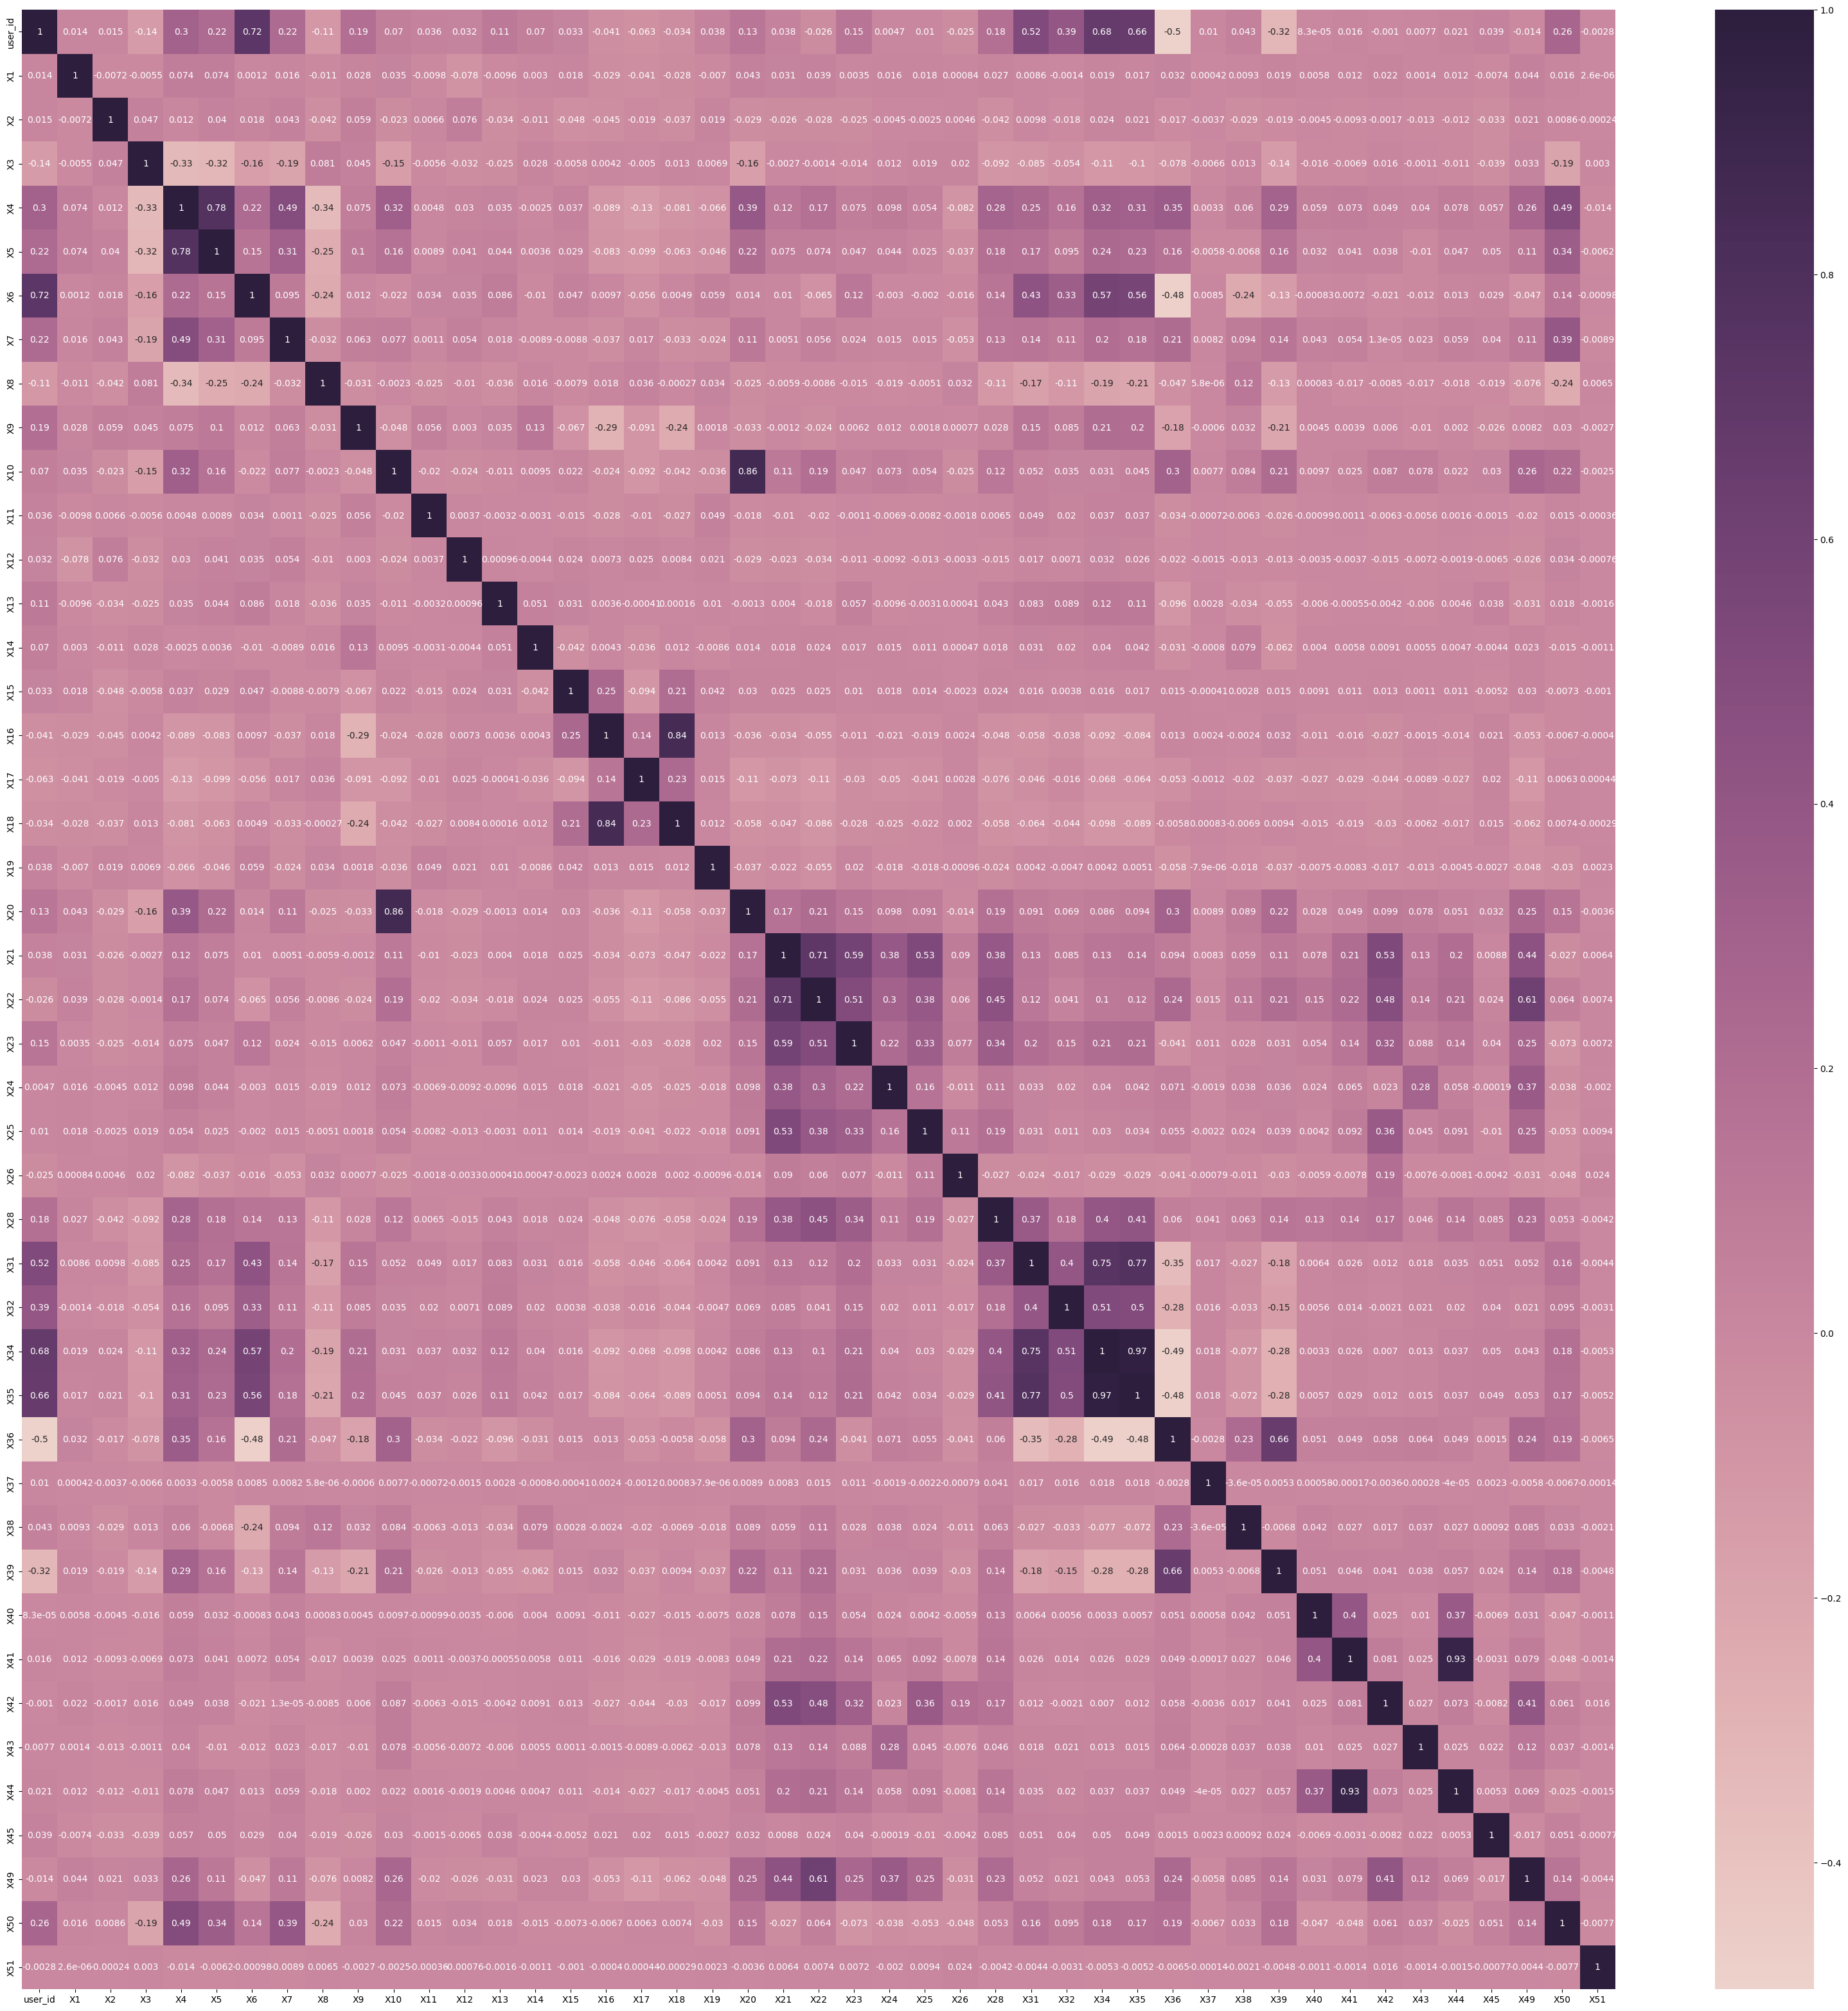

In [43]:
#lets visualize our scaled data.
plt.figure(figsize=(40,40))
sns.heatmap(PPS_sc.corr(),annot=True,cmap=sns.cubehelix_palette(as_cmap=True))

#Splitting independent and dependent data.

In [16]:
X=PPS_sc
y=PPS_df["label"]

In [17]:
X.T

0         1         2         3         4         5         6       \
user_id  0.000000  0.000002  0.000004  0.000006  0.000008  0.000010  0.000012   
X1       0.865390  0.303759  0.875459  0.093261  0.187430  0.303388  0.563983   
X2       0.058824  0.959276  0.968326  0.954751  0.959276  0.959276  0.959276   
X3       0.129032  0.752688  0.752688  0.752688  0.752688  0.129032  0.752688   
X4       1.000000  1.000000  1.000000  0.500000  0.500000  1.000000  0.500000   
X5       0.625000  0.625000  0.625000  0.437500  0.437500  0.625000  0.437500   
X6       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
X7       0.100000  0.100000  0.100000  0.100000  0.100000  0.100000  0.100000   
X8       0.500000  0.500000  0.500000  0.500000  0.500000  0.500000  0.500000   
X9       0.675676  0.675676  0.351351  0.351351  0.351351  0.945946  0.675676   
X10      0.986260  0.986260  0.986260  0.985333  0.986260  0.000000  0.986260   
X11      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
X12      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
X13      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
X14      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
X15      0.000000  0.000000  0.071429  0.000000  0.000000  0.000000  0.000000   
X16      0.191489  0.191489  0.276596  0.212766  0.255319  0.191489  0.191489   
X17      0.076923  0.076923  0.000000  0.000000  0.038462  0.076923  0.269231   
X18      0.250000  0.333333  0.416667  0.250000  0.416667  0.291667  0.250000   
X19      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
X20      1.000000  1.000000  1.000000  1.000000  1.000000  0.000000  1.000000   
X21      0.012061  0.012061  0.010965  0.013158  0.026316  0.019737  0.015351   
X22      0.185185  0.203704  0.185185  0.222222  0.333333  0.259259  0.203704   
X23      0.066667  0.133333  0.066667  0.000000  0.333333  0.133333  0.066667   
X24      0.000000  0.000000  0.000000  0.025000  0.000000  0.000000  0.050000   
X25      0.000000  0.000000  0.000000  0.000000  0.001453  0.000000  0.000000   
X26      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
X28      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
X31      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
X32      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
X34      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
X35      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
X36      0.125000  0.125000  0.125000  0.125000  0.125000  0.125000  0.125000   
X37      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
X38      0.026316  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
X39      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.031250   
X40      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
X41      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
X42      0.000000  0.000000  0.000000  0.000000  0.000000  0.010309  0.000000   
X43      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
X44      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
X45      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
X49      0.000000  0.000000  0.000000  1.000000  0.000000  1.000000  1.000000   
X50      1.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
X51      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

           7         8         9       ...    458788    458789    458790  \
user_id  0.000014  0.000017  0.000019  ...  0.999981  0.999983  0.999986   
X1       0.253291  0.815953  0.112615  ...  0.647547  0.617835  0.226509   
X2       0.950226  0.950226  0.203620  ...  0.959276  0.

In [18]:
y

0         0
1         0
2         0
3         0
4         0
         ..
458793    0
458794    0
458795    0
458796    0
458797    0
Name: label, Length: 458798, dtype: int64

In [19]:
#Creating Logistic model and impoting the libraries.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
#first check whether the dependent variables is labeled or not.

In [21]:
PPS_df.label.value_counts()

0    446477
1     12321
Name: label, dtype: int64

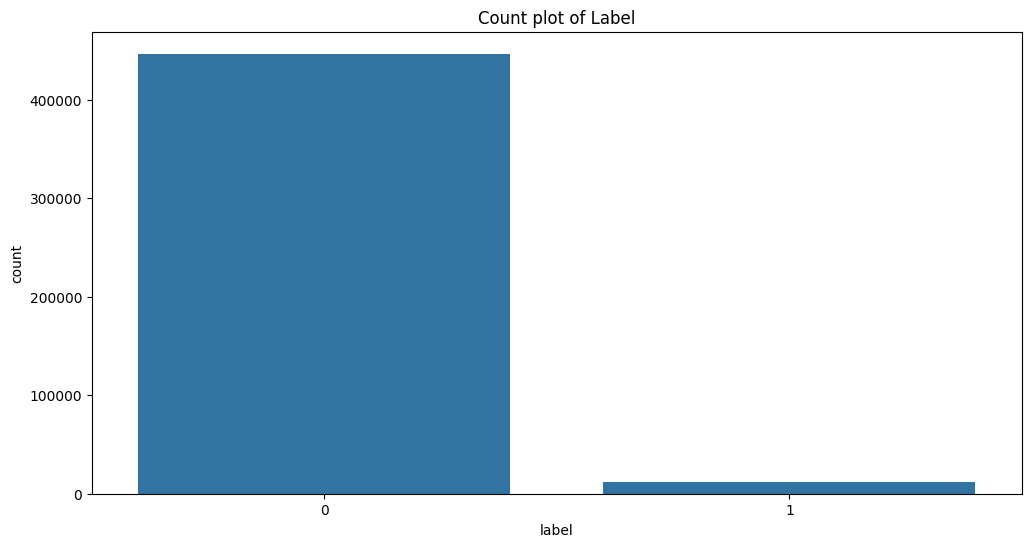

In [22]:
# VISUALIZE target variable
plt.figure(figsize=(12,6))
sns.countplot(data=PPS_df, x = 'label')
plt.title('Count plot of Label')
plt.show()

In [51]:
#dependent variable is not labeled. lets label is first.

In [23]:
#this step i done here because there is a error come which tell me that there are NAN values are present in the X_train data.
#checking the NAN values present in the X_train data.
nan_count = pd.DataFrame(X_train).isna().sum().sum()

if nan_count > 0:
    print("X_train contains NaN values.")
else:
    print("X_train does not contain NaN values.")

X_train contains NaN values.


In [24]:
#there are NAN values present in the data.
#handeling NAN values by using impute method and replace NAN values by the mean.
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)

In [27]:
#now after handelling the NAN values, we are able to perform the labeling step to labele the data.
#labelling the data by using SMOTE method.

In [25]:
from imblearn.over_sampling import SMOTE

In [26]:
oversample = SMOTE(random_state=42)

x_sampled,y_sampled = oversample.fit_resample(X_train,y_train)

In [27]:
x_sampled.shape

(714248, 45)

In [28]:
y_sampled.value_counts()

0    357124
1    357124
Name: label, dtype: int64

# logistic model

In [29]:
# Train a logistic regression model
logimodel = LogisticRegression()
logimodel.fit(X_train, y_train)

LogisticRegression()

In [30]:
# Make predictions on the training set
logi_train_pred = logimodel.predict(X_train)

In [31]:
imputer = SimpleImputer(strategy="mean")
X_test = imputer.fit_transform(X_test)

In [32]:
# Make predictions on the test set
logi_pred = logimodel.predict(X_test)

In [33]:
# Evaluate accuracy on training and test sets
logi_train_accuracy = accuracy_score(y_train, logi_train_pred)
logi_test_accuracy = accuracy_score(y_test, logi_pred)

In [34]:
print(f"Training Accuracy: {logi_train_accuracy}")
print(f"Test Accuracy: {logi_test_accuracy}")

Training Accuracy: 0.9770650450362088
Test Accuracy: 0.9778007846556234


In [35]:
# Check for overfitting
if logi_train_accuracy > logi_test_accuracy:
    print("Warning: Model may be overfitting the training data.")

In [36]:
logi_pred =logimodel.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Evaluate the model
logi_test_accuracy = accuracy_score(y_test, logi_pred)
logi_conf_matrix = confusion_matrix(y_test, logi_pred )
logi_classification_rep = classification_report(y_test, logi_pred )

# Display results
print(f'logi_test_accuracy: {logi_test_accuracy}')
print('\nlogi_Confusion Matrix:')
print(logi_conf_matrix)
print('\nlogi_Classification Report:')
print(logi_classification_rep)

logi_test_accuracy: 0.9778007846556234

logi_Confusion Matrix:
[[89219   134]
 [ 1903   504]]

logi_Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     89353
           1       0.79      0.21      0.33      2407

    accuracy                           0.98     91760
   macro avg       0.88      0.60      0.66     91760
weighted avg       0.97      0.98      0.97     91760



1. Insights interpret from Confusion matrix -:

True Positive (TP): 89219

True Negative (TN): 504

False Positive (FP): 134

False Negative (FN): 1903

Insights:

1. Accuracy:

The overall accuracy of the model is 98%, indicating that it correctly predicts the class label for approximately 98% of the samples.

2. Precision:

Precision for class 0 (Negative class) is high (98%), indicating that when the model predicts the class as 0, it is correct 98% of the time.
Precision for class 1 (Positive class) is lower (79%), indicating that when the model predicts the class as 1, it is correct only 79% of the time.

3. Recall (Sensitivity):

Recall for class 0 is very high (100%), indicating that the model correctly identifies nearly all instances of class 0.
Recall for class 1 is low (21%), indicating that the model fails to identify a significant portion of instances of class 1.

4. F1-Score:

The F1-score for class 0 is high (99%), reflecting a good balance between precision and recall for class 0.
The F1-score for class 1 is relatively low (33%), indicating a lower balance between precision and recall for class 1.

5. Support:

The support represents the number of actual occurrences of each class in the dataset. Class 0 has much higher support (89353) compared to class 1 (2407), indicating class imbalance.

# Decision tree model

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [39]:
decision_model= DecisionTreeClassifier()

In [40]:
decision_model.fit(X_train, y_train)

DecisionTreeClassifier()

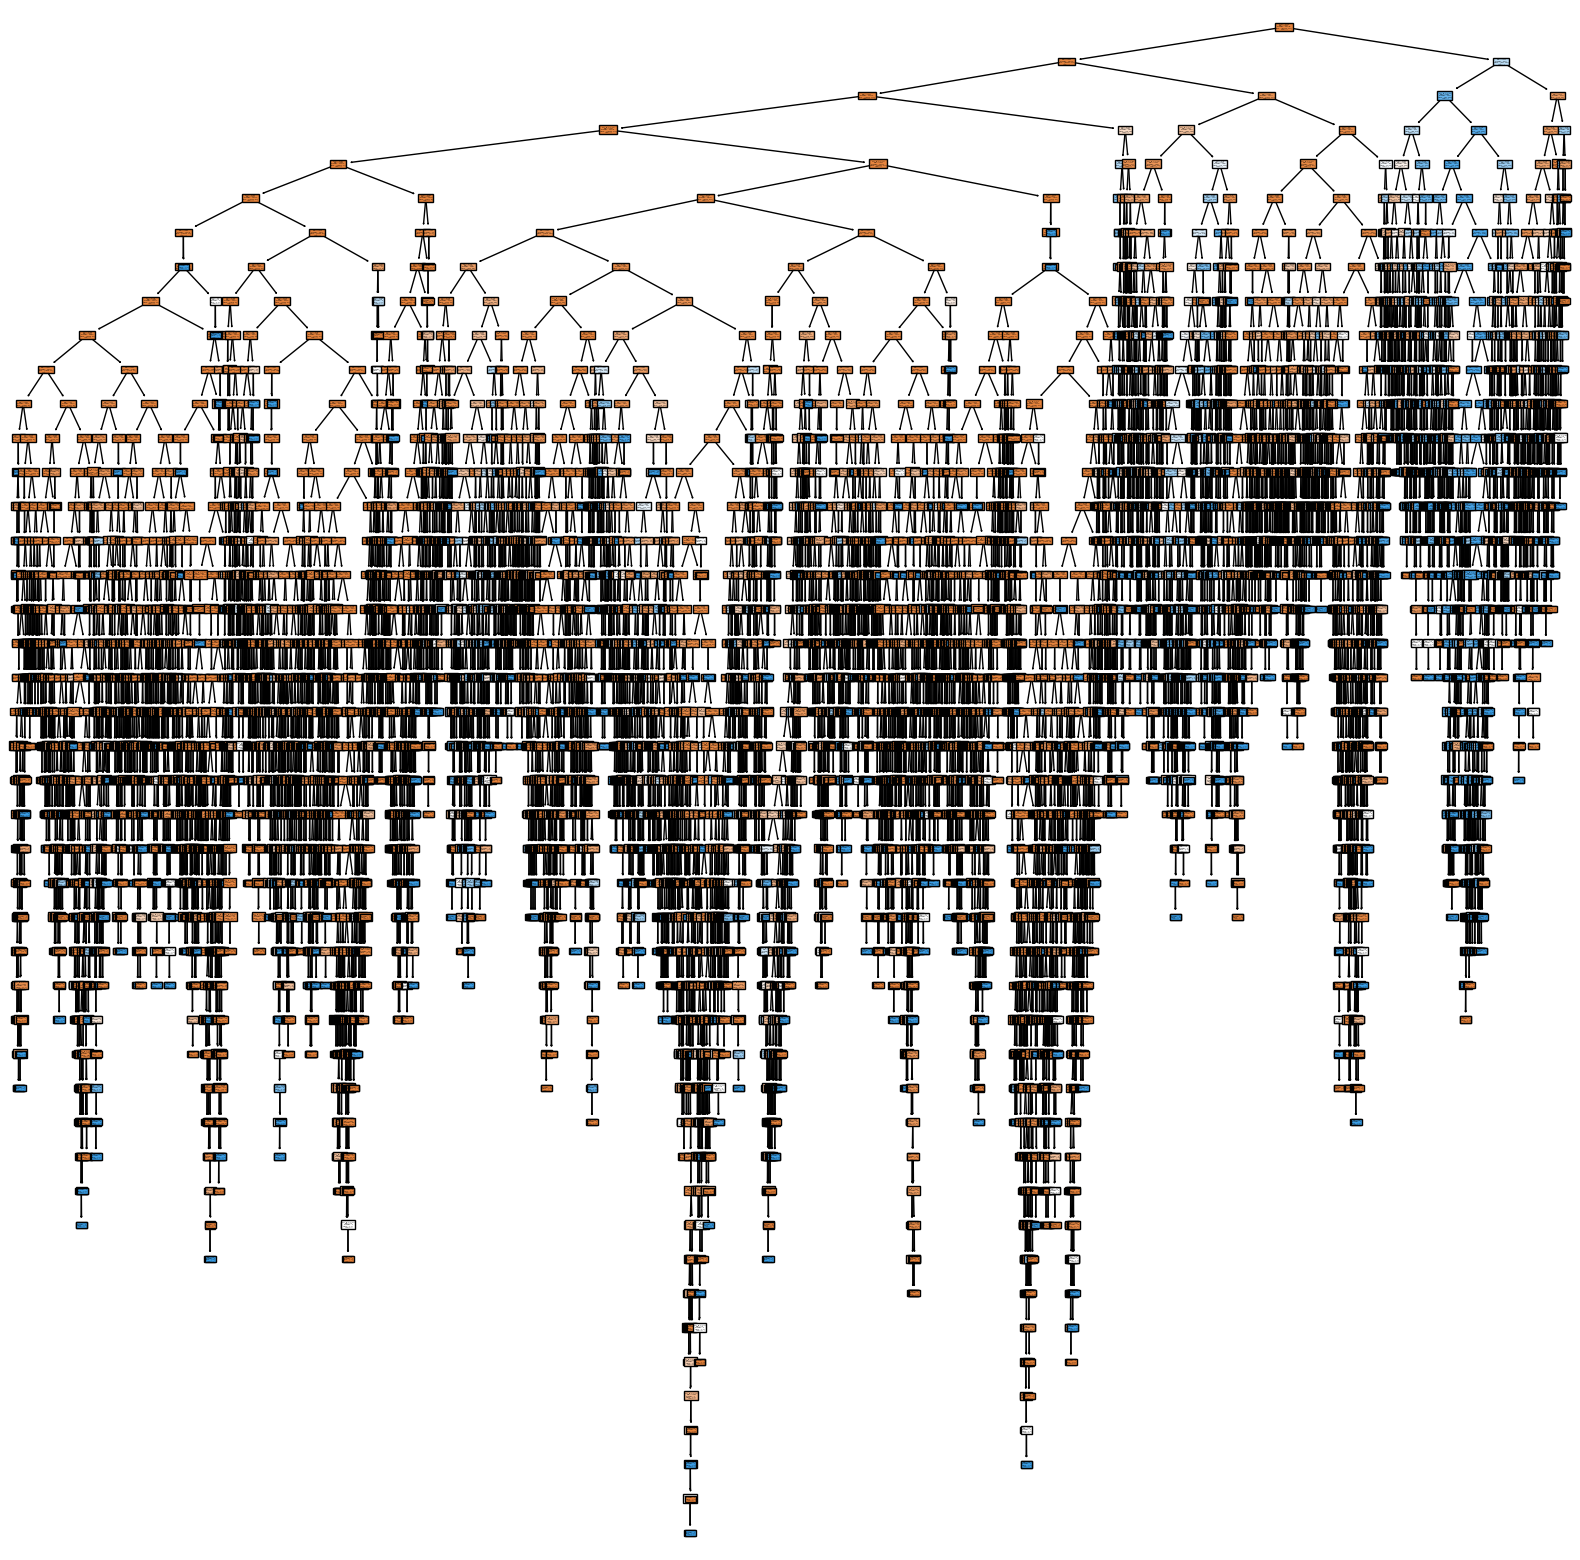

In [ ]:
plt.figure(figsize=(20,20))
tree.plot_tree(decision_model,filled=True,class_names=[str(i) for i in set(y)], feature_names=X.columns)
plt.savefig('decision_model')

In [41]:
dt_pred = decision_model.predict(X_test)

In [42]:
dt_score = accuracy_score(y_test,dt_pred)

In [43]:
dt_score = decision_model.score(X_test, y_test)

In [44]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Evaluate the model
dt_score = accuracy_score(y_test, dt_pred )
dt_conf_matrix = confusion_matrix(y_test, dt_pred )
dt_classification_rep = classification_report(y_test, dt_pred )

# Display results
print(f'Accuracy: {dt_score}')
print('\ndt_Confusion Matrix:')
print(dt_conf_matrix)
print('\nClassification Report:')
print(dt_classification_rep)

Accuracy: 0.9752397558849172

dt_Confusion Matrix:
[[88089  1264]
 [ 1008  1399]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     89353
           1       0.53      0.58      0.55      2407

    accuracy                           0.98     91760
   macro avg       0.76      0.78      0.77     91760
weighted avg       0.98      0.98      0.98     91760




Precision:

Precision for class 0 is 99%, indicating that when the model predicts the class as 0, it is correct 99% of the time. For class 1, precision is 53%, meaning that 53% of instances predicted as class 1 are indeed class 1.

Recall (Sensitivity):

Recall for class 0 is 99%, meaning that the model correctly identifies 99% of instances of class 0. However, recall for class 1 is 58%, indicating that the model fails to identify 42% of class 1 instances.

F1-score:

The F1-score is the harmonic mean of precision and recall. F1-score for class 0 is 99%, reflecting a good balance between precision and recall. For class 1, F1-score is 55%, indicating a lower balance between precision and recall.

Support:

Support represents the number of actual occurrences of each class in the dataset. Class 0 has a much higher support (89353) compared to class 1 (2407), indicating class imbalance.

# Random forest model

In [45]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [46]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [47]:
nan_count = pd.DataFrame(X_train).isna().sum().sum()

if nan_count > 0:
    print("X_train contains NaN values.")
else:
    print("X_train does not contain NaN values.")

X_train contains NaN values.


In [48]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)

In [49]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
X_test = imputer.fit_transform(X_test)

In [50]:
# Apply SMOTE for oversampling
smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [51]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)

In [52]:
# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [53]:
# Make predictions on the test data
rf_pred = rf_classifier.predict(X_test)

In [54]:
# Evaluate the accuracy of the model
rf_testing_accuracy = accuracy_score(y_test, rf_pred)
print(f"rf_testing_accuracy: {rf_testing_accuracy}")

rf_testing_accuracy: 0.9858653007846556


In [55]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Evaluate the model
rf_testing_accuracy = accuracy_score(y_test, rf_pred )
rf_conf_matrix = confusion_matrix(y_test, rf_pred )
rf_classification_rep = classification_report(y_test, rf_pred )

# Display results
print(f'rf_testing_accuracy: {rf_testing_accuracy}')
print('\nrf_Confusion Matrix:')
print(rf_conf_matrix)
print('\nrf_Classification Report:')
print(rf_classification_rep)

rf_testing_accuracy: 0.9858653007846556

rf_Confusion Matrix:
[[89120   177]
 [ 1120  1343]]

rf_Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     89297
           1       0.88      0.55      0.67      2463

    accuracy                           0.99     91760
   macro avg       0.94      0.77      0.83     91760
weighted avg       0.98      0.99      0.98     91760



Overall Accuracy: The random forest model achieves an accuracy of approximately 98.59% on the testing data, indicating that it correctly classifies the majority of instances.

Confusion Matrix: The confusion matrix reveals that the model predicts class 0 (negative class) with high accuracy, as evidenced by the large number of true negatives (89120) and the small number of false positives (177). However, it is less accurate in predicting class 1 (positive class), as indicated by the moderate number of false negatives (1120) and true positives (1343).

Precision and Recall: The precision for class 0 is very high (99%), indicating a low false positive rate. However, the precision for class 1 is slightly lower (88%), suggesting that there is a relatively higher false positive rate for this class. The recall for class 0 is excellent (100%), indicating that the model correctly identifies nearly all instances of class 0. In contrast, the recall for class 1 is moderate (55%), indicating that the model misses a significant portion of class 1 instances.

F1-score: The F1-score, which considers both precision and recall, is high for class 0 (99%), indicating a good balance between precision and recall. However, for class 1, the F1-score is lower (67%), indicating a less balanced performance between precision and recall.

Class Imbalance: The support values in the classification report indicate a significant class imbalance, with a much larger number of instances for class 0 (89297) compared to class 1 (2463). This class imbalance could impact the model's performance, particularly in terms of its ability to correctly classify instances of the minority class (class 1).

Note ----> The median is a robust statistic, meaning that it is not affected by outliers. This makes it a good choice for imputing missing values when the data is skewed or contains outliers.

There are other methods that can be used to handle missing values, such as:

Mean imputation: 

This replaces missing values with the mean of the non-missing values.

Mode imputation:

This replaces missing values with the most frequent value.

K-nearest neighbors imputation: 

This replaces missing values with the average of the k nearest neighbors.
The choice of imputation method depends on the data and the assumptions made about the missing values.

In this case, since the data is skewed and may contain outliers, using the median imputation method is a good choice.

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
data = imputer.fit_transform(data)

# SVM model

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [108]:
nan_count = pd.DataFrame(X_train).isna().sum().sum()

if nan_count > 0:
    print("X_train contains NaN values.")
else:
    print("X_train does not contain NaN values.")

X_train contains NaN values.


In [109]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)

In [110]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
X_test = imputer.fit_transform(X_test)

In [111]:
# Apply SMOTE for oversampling
smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [112]:
# Create a Support Vector Machine classifier
svm_classifier = SVC(kernel='rbf', C=1.0, random_state=42)

In [114]:
svm_classifier.fit(X_train, y_train)

SVC(random_state=42)

In [115]:
svc_pred = svm_classifier.predict(X_test)

In [118]:
svc_pred

array([0, 0, 0, ..., 0, 0, 0])

In [117]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Evaluate the model
svc_testing_accuracy = accuracy_score(y_test, svc_pred )
svc_conf_matrix = confusion_matrix(y_test, svc_pred )
svc_classification_rep = classification_report(y_test, svc_pred)

# Display results
print(f'svc_testing_accuracy: {svc_testing_accuracy}')
print('\nsvc_Confusion Matrix:')
print(svc_conf_matrix)
print('\nsvc_Classification Report:')
print(svc_classification_rep)

svc_testing_accuracy: 0.9795117698343505

svc_Confusion Matrix:
[[89270    83]
 [ 1797   610]]

svc_Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     89353
           1       0.88      0.25      0.39      2407

    accuracy                           0.98     91760
   macro avg       0.93      0.63      0.69     91760
weighted avg       0.98      0.98      0.97     91760



# KNeighbors model

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [57]:
k = 3

In [58]:
knn_classifier = KNeighborsClassifier(n_neighbors=k)

In [59]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)

In [60]:
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [61]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
X_test = imputer.fit_transform(X_test)

In [62]:
kn_pred = knn_classifier.predict(X_test)

In [63]:
kn_testing_accuracy = accuracy_score(y_test, kn_pred)
print(f"Accuracy: {kn_testing_accuracy}")

Accuracy: 0.9792284219703574


In [64]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Evaluate the model
kn_testing_accuracy = accuracy_score(y_test, kn_pred )
kn_conf_matrix = confusion_matrix(y_test, kn_pred )
kn_classification_rep = classification_report(y_test, kn_pred )

# Display results
print(f'Accuracy: {kn_testing_accuracy}')
print('\nConfusion Matrix:')
print(kn_conf_matrix)
print('\nClassification Report:')
print(kn_classification_rep)

Accuracy: 0.9792284219703574

Confusion Matrix:
[[88708   589]
 [ 1317  1146]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     89297
           1       0.66      0.47      0.55      2463

    accuracy                           0.98     91760
   macro avg       0.82      0.73      0.77     91760
weighted avg       0.98      0.98      0.98     91760



# Gaussian naive_bayes

In [65]:
from sklearn.naive_bayes import GaussianNB

In [66]:
naive_bayes_classifier = GaussianNB()

In [67]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)

In [68]:
naive_bayes_classifier.fit(X_train, y_train)

GaussianNB()

In [69]:
# Make predictions on the test data
nb_pred = naive_bayes_classifier.predict(X_test)

In [70]:
nb_testing_accuracy = accuracy_score(y_test, nb_pred)
print(f"Accuracy: {nb_testing_accuracy}")

Accuracy: 0.6711857018308631


In [71]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Evaluate the model
nb_testing_accuracy = accuracy_score(y_test, nb_pred)
nb_conf_matrix = confusion_matrix(y_test, nb_pred )
nb_classification_rep = classification_report(y_test, nb_pred )

# Display results
print(f'Accuracy: {nb_testing_accuracy}')
print('\nConfusion Matrix:')
print(nb_conf_matrix)
print('\nClassification Report:')
print(nb_classification_rep)

Accuracy: 0.6711857018308631

Confusion Matrix:
[[59381 29916]
 [  256  2207]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.66      0.80     89297
           1       0.07      0.90      0.13      2463

    accuracy                           0.67     91760
   macro avg       0.53      0.78      0.46     91760
weighted avg       0.97      0.67      0.78     91760



# XGBOOST

In [72]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [73]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
# Create an XGBoost classifier
xgb_model = XGBClassifier(objective='binary:logistic', random_state=42)

In [75]:
# Train the model
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [76]:
# Make predictions on the test set
xg_pred = xgb_model.predict(X_test)

In [77]:
# Evaluate the model
xg_testing_accuracy = accuracy_score(y_test, xg_pred)
xg_conf_matrix = confusion_matrix(y_test, xg_pred)
xg_classification_rep = classification_report(y_test, xg_pred)

# Display the results
print("XGBoost Model:")
print("Accuracy:", xg_testing_accuracy)
print("\nConfusion Matrix:\n", xg_conf_matrix)
print("\nClassification Report:\n", xg_classification_rep)

XGBoost Model:
Accuracy: 0.987216652136007

Confusion Matrix:
 [[89114   239]
 [  934  1473]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     89353
           1       0.86      0.61      0.72      2407

    accuracy                           0.99     91760
   macro avg       0.93      0.80      0.85     91760
weighted avg       0.99      0.99      0.99     91760



Accuracy: The model achieves an accuracy of approximately 98.72%, indicating that it correctly classifies the majority of instances.

Confusion Matrix:

True negatives (TN): 1473

False positives (FP): 239

False negatives (FN): 934

True positives (TP): 89114

This matrix demonstrates that the model is particularly effective at correctly identifying instances of the majority class (0), but it does have some false negatives for the minority class (1).

Precision and Recall:

Precision for class 0 is 99%, indicating a low false positive rate.
Precision for class 1 is 86%, indicating that when the model predicts class 1, it is correct 86% of the time.

Recall for class 0 is 100%, suggesting the model effectively captures all instances of class 0.
Recall for class 1 is 61%, indicating that the model identifies 61% of actual instances of class 1.

F1-score: The F1-score, which balances precision and recall, is high for class 0 (99%) and moderate for class 1 (72%).

Support: The support values indicate a significant class imbalance, with a much larger number of instances for class 0 compared to class 1.

Let's make data frame of all the models which one is giving good accuracy.

In [123]:
models = pd.DataFrame({'Model': ['Logistic Regression','Random Forest','Decision Tree','XGBoost Classifier', 'KNeighbors model','Gaussian naive_bayse','svm'],
                       'Score': [logi_test_accuracy*100 , rf_testing_accuracy*100, dt_score *100, xg_testing_accuracy *100,kn_testing_accuracy*100, nb_testing_accuracy*100, svc_testing_accuracy*100]}).round(2)

In [124]:
models

Model  Score
0   Logistic Regression  97.78
1         Random Forest  98.59
2         Decision Tree  97.52
3    XGBoost Classifier  98.72
4      KNeighbors model  97.92
5  Gaussian naive_bayse  67.12
6                   svm  97.95

As we can see that xgboost and random forest is the algorithms which gives good accuracies. 